In [1]:
version


               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          4.2                         
year           2024                        
month          10                          
day            31                          
svn rev        87279                       
language       R                           
version.string R version 4.4.2 (2024-10-31)
nickname       Pile of Leaves              


	Shapiro-Wilk normality test

data:  dd
W = 0.95421, p-value = 0.001589


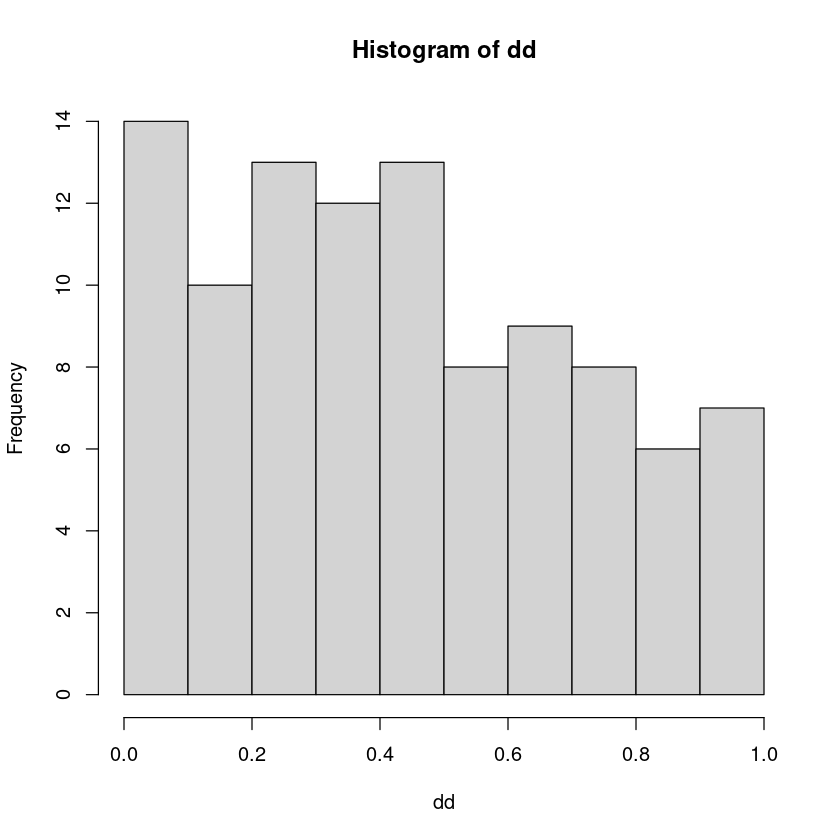

In [1]:
dd = runif(100)

hist(dd)
shapiro.test(dd)

# QQ Plots

Quantile-Quantile (QQ) plots are a graphical tool used to assess whether a dataset follows a specified distribution, often the normal distribution but can be any distribution which makes it useful. 

## Understanding QQ Plots

A QQ plot compares the quantiles of the dataset against the quantiles of a theoretical distribution. If the data follows the theoretical distribution, the points on the QQ plot will be aligned approximately along a straight line.

### Non-Parametric and use for Non-Normal Data

QQ plots are a non-parametric tool, meaning they do not make any strict assumptions about the underlying distribution of the data being analyzed. While they are often used to assess normality, QQ plots can be applied to 'any' theoretical distribution, making them versatile for exploring a wide range of data types. This non-parametric nature allows QQ plots to provide insights even when dealing with non-normal data, as they can reveal deviations from any specified distribution, be it exponential, uniform, or any other. As such, QQ plots are a powerful diagnostic tool for evaluating how well your data conforms to various distributional assumptions, not just just normality.


### One-Sample and Two-Sample QQ Plots

QQ plots can be used in both one-sample and two-sample cases. In the one-sample case, the QQ plot is used to compare the quantiles of a single dataset to the quantiles of a theoretical distribution, such as the normal distribution, to assess the goodness-of-fit. In the two-sample case, the QQ plot compares the quantiles of two different datasets directly against each other. This is useful for evaluating whether the two samples come from the same distribution, even if that distribution is unknown. The one-sample QQ plot helps in diagnosing how well a single dataset matches a specific distribution, while the two-sample QQ plot is a non-parametric method for comparing the distributions of two datasets to identify similarities or differences.


### Steps to Create your QQ Plot

1. Order the Data: Sort the sample data in ascending order.
2. Compute Quantiles of the Data: Calculate the quantiles of the ordered data. For a sample of size \( n \), the quantiles are typically \( \frac{i}{n+1} \), where \( i \) is the rank of each data point.
3. Compute Theoretical Quantiles: Determine the quantiles from the theoretical distribution that correspond to the data quantiles. For example, for a normal distribution, these quantiles are obtained from the inverse cumulative distribution function (CDF), also known as the quantile function.
4. Plot the Quantiles: On the QQ plot, plot the data quantiles on the y-axis and the theoretical quantiles on the x-axis.

### Interpreting QQ Plots:

- Linear Relationship: If the data is from the same distribution as the theoretical distribution, the points will approximately lie on a straight line.
- Deviations from Linearity:
  - Heavy-Tailed Distributions: Points deviate upwards in the tails.
  - Light-Tailed Distributions: Points deviate downwards in the tails.
  - Skewness: Points curve away from the line, indicating a skew in the data.

### Relevant Formulas

- Data Quantile: \( Q_{\text{data}}(p) = \text{sorted data value at } \frac{p \times (n + 1)}{n} \)
- Theoretical Quantile (for normal distribution): \( Q_{\text{theoretical}}(p) = \mu + \sigma \times \Phi^{-1}(p) \)

Where:
- \( p \) is the quantile level (e.g., 0.25, 0.50, 0.75, etc.).
- \( \mu \) and \( \sigma \) are the mean and standard deviation of the theoretical distribution, respectively.
- \( \Phi^{-1}(p) \) is the inverse cumulative distribution function (quantile function) of the theoretical distribution.

### Example Applications

QQ plots are used to:
- Check if a dataset is normally distributed.
- Compare two datasets to see if they come from the same distribution.
- Identify outliers or data anomalies.

By visually inspecting the QQ plot, you can gain insights into the distributional properties of your data and make informed decisions regarding the appropriateness of statistical models that assume specific distributions.


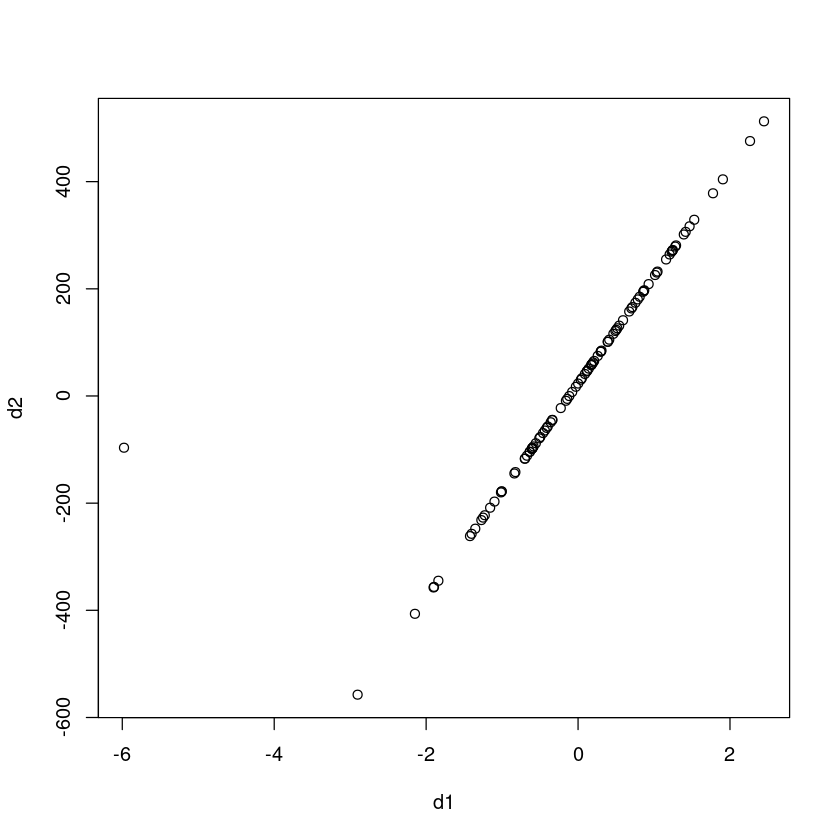

In [2]:
d1 = rnorm(100)
d2 = 200*d1 + 23
d1[1] = d1[1]*10
plot(d1, d2)

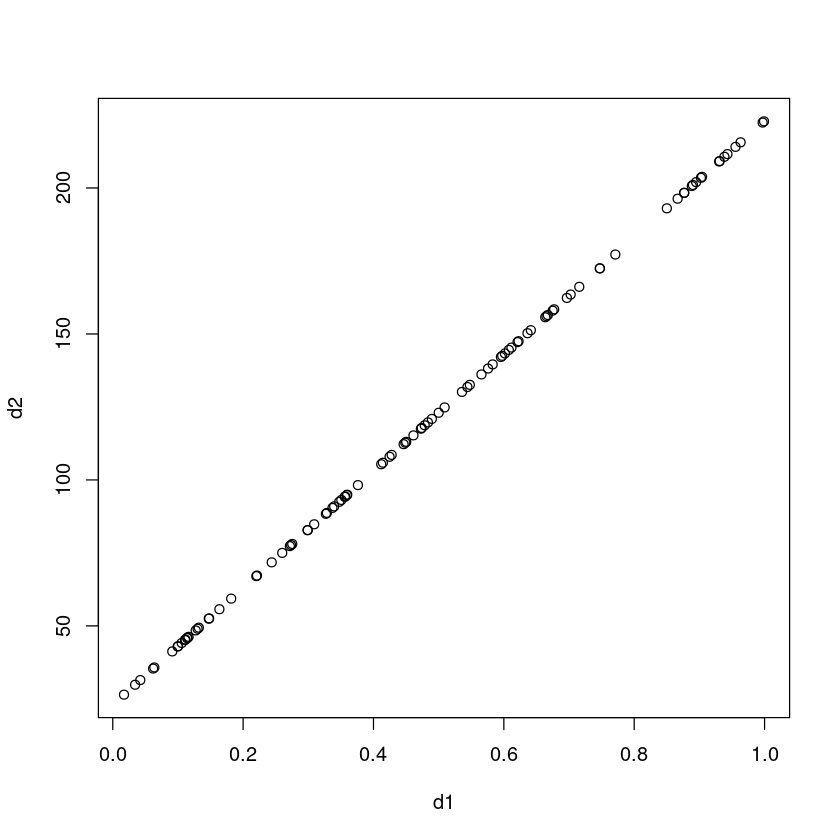

In [3]:
d1 = runif(100)
d2 = 200*d1 + 23
d1[1] = d1[1]*1
plot(d1, d2)

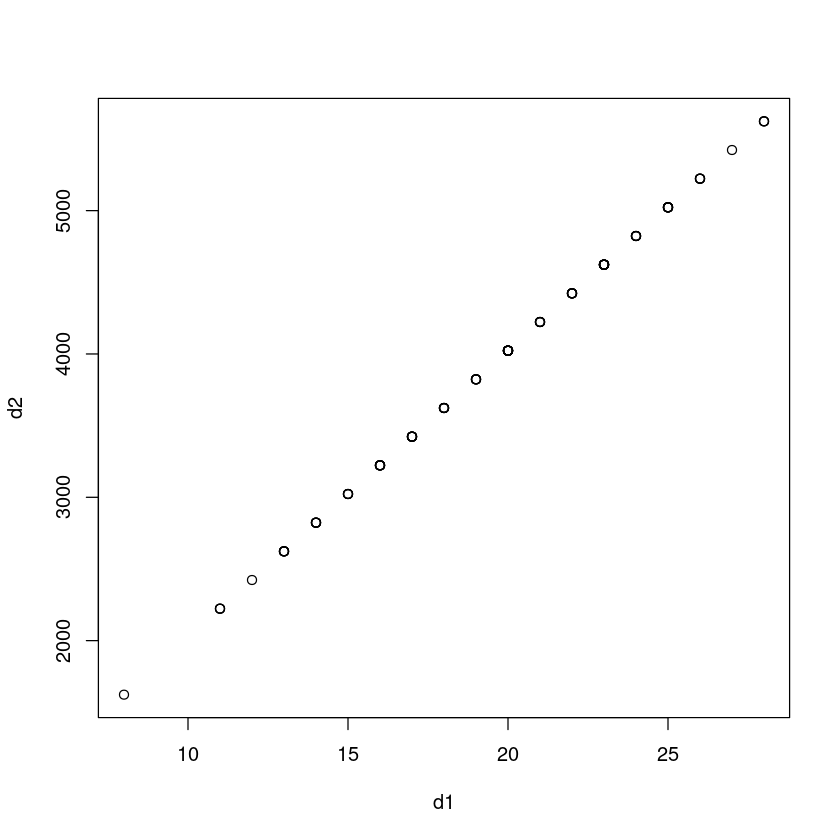

In [4]:
d1 = rpois(100,20)
d2 = 200*d1 + 23
d1[1] = d1[1]*1
plot(d1, d2)

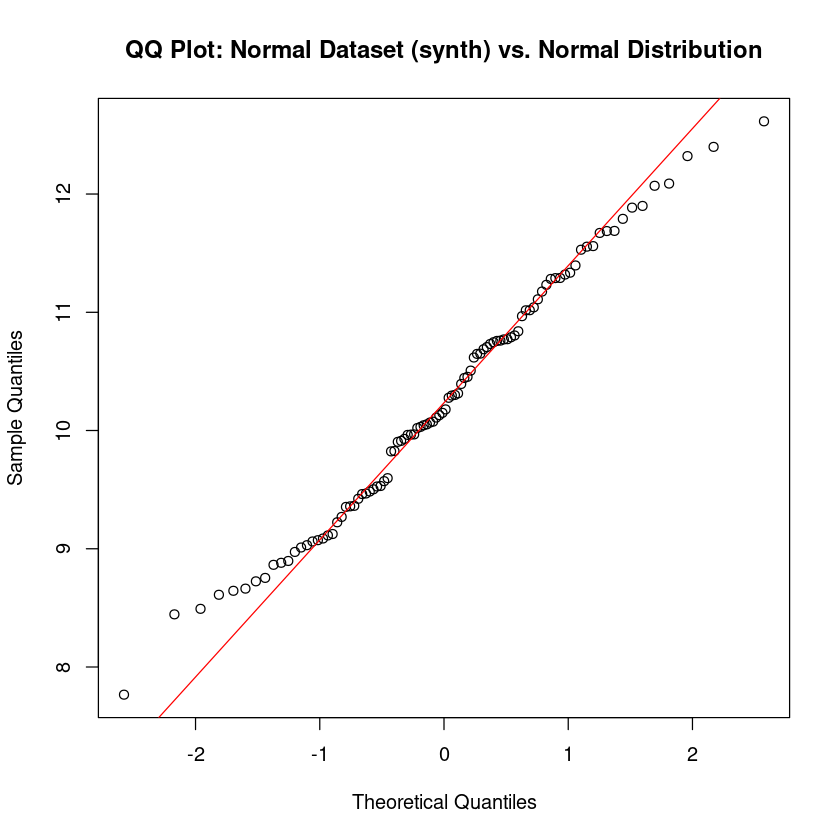

In [21]:
max_ind = which( normal_data == max(normal_data) )
normal_data[max_ind] = mean(normal_data)

qqnorm(normal_data, 
            main = "QQ Plot: Normal Dataset (synth) vs. Normal Distribution")
qqline(normal_data, col = "red")

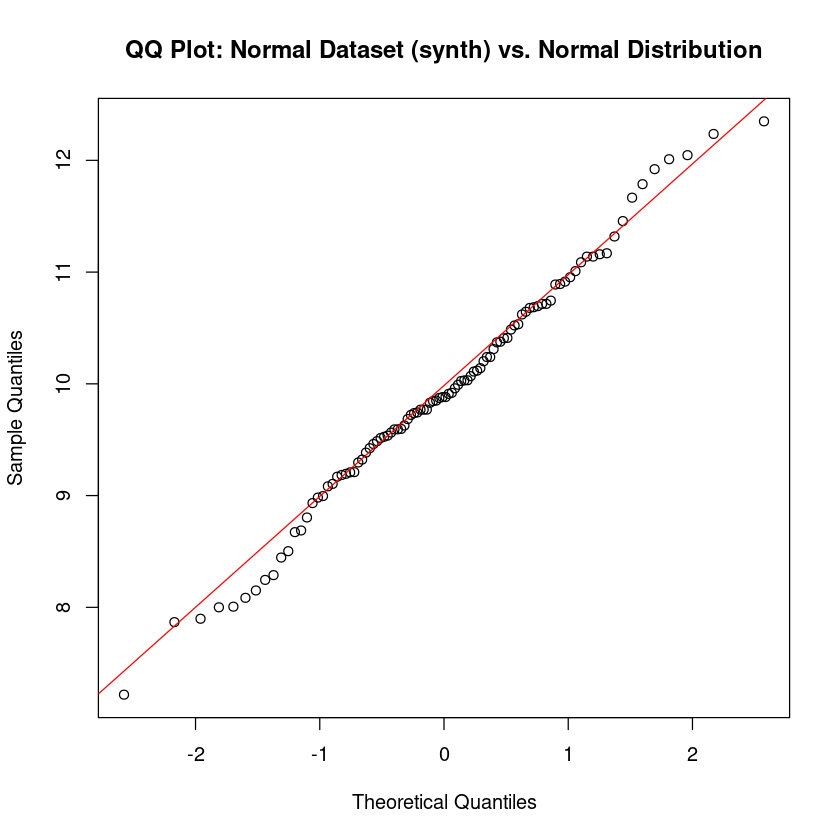

In [22]:
normal_data = rnorm(100, mean = 10, sd = 1)

qqnorm(normal_data, 
            main = "QQ Plot: Normal Dataset (synth) vs. Normal Distribution")
qqline(normal_data, col = "red")

## now with an outlier on the right

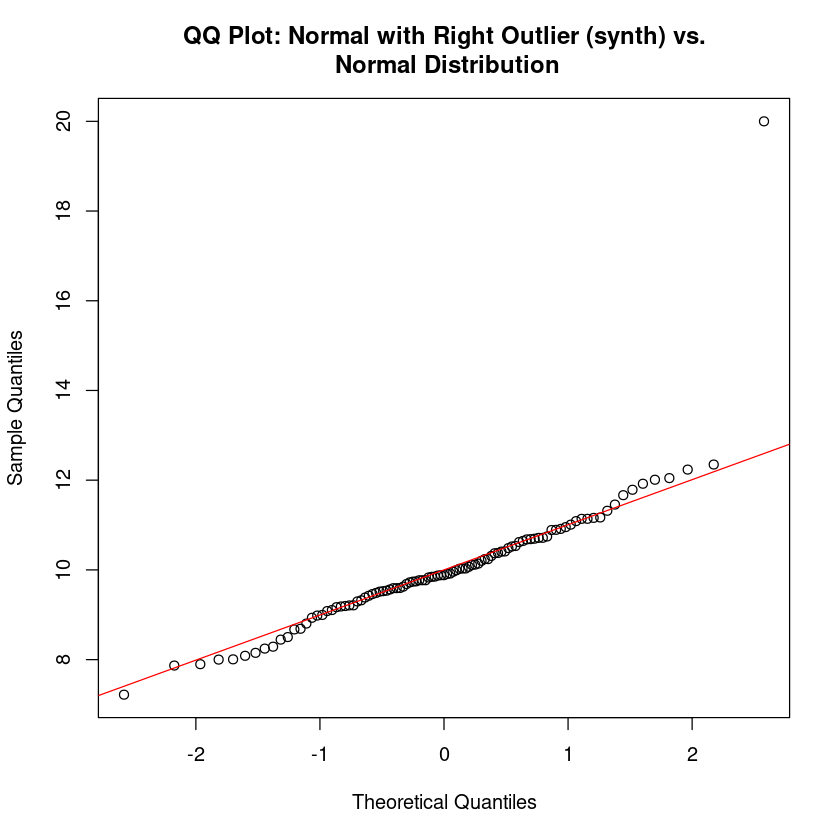

In [25]:
# Add a right outlier
normal_data_outlier_right = c(normal_data, 20)

# Create a QQ plot against a normal distribution
qqnorm(normal_data_outlier_right, 
                main = "QQ Plot: Normal with Right Outlier (synth) vs.\n Normal Distribution")
qqline(normal_data_outlier_right, col = "red")

### outlier on both sides

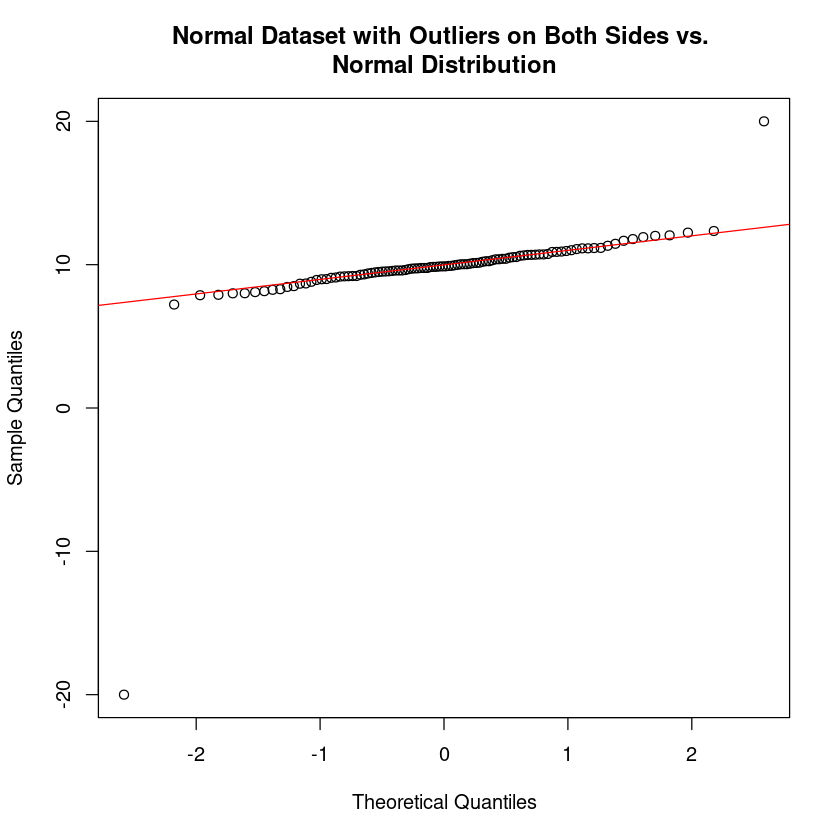

In [27]:
normal_data_outliers_both = c(normal_data, -20, 20)

qqnorm(normal_data_outliers_both, main = "Normal Dataset with Outliers on Both Sides vs. \nNormal Distribution")
qqline(normal_data_outliers_both, col = "red")

### non-normal dataset with right skew gamma distribution vs normal

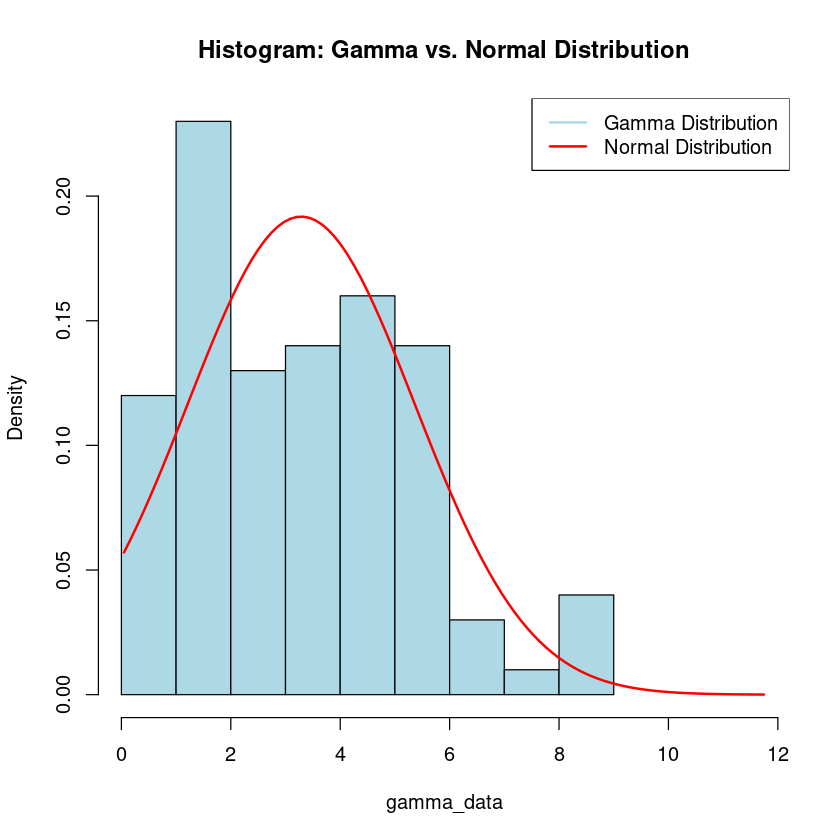

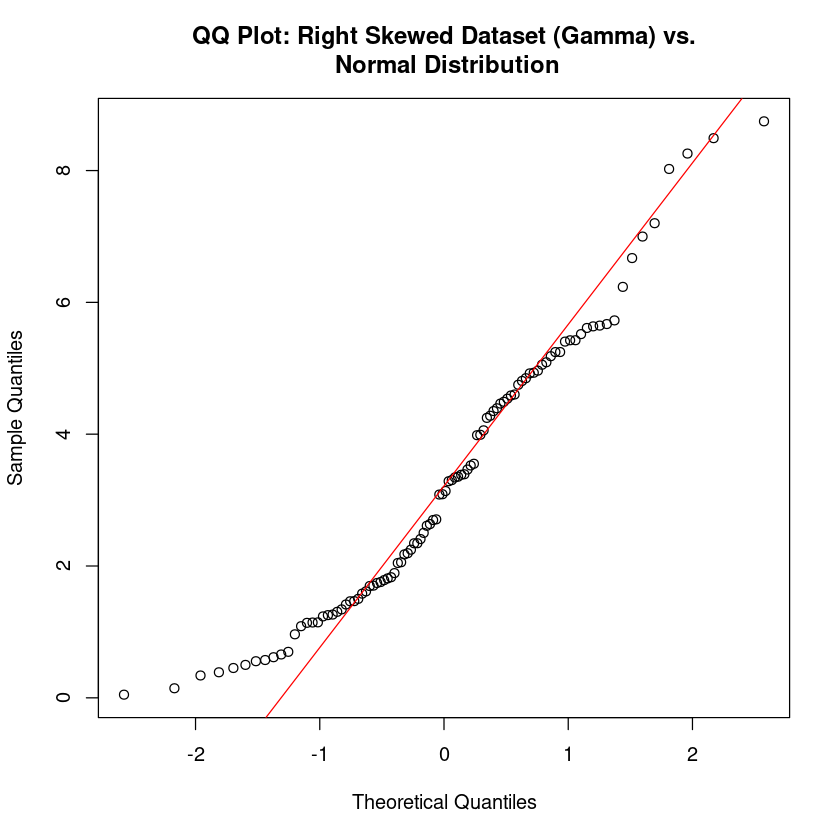

In [28]:
gamma_data = rgamma(100, shape = 2, scale = 2)

hist(gamma_data, probability = TRUE, main = "Histogram: Gamma vs. Normal Distribution", xlim = c(min(gamma_data), max(gamma_data) + 3), col = "lightblue", border = "black")
curve(dnorm(x, mean = mean(gamma_data), sd = sd(gamma_data)), add = TRUE, col = "red", lwd = 2)
legend("topright", legend = c("Gamma Distribution", "Normal Distribution"), col = c("lightblue", "red"), lwd = 2)

qqnorm(gamma_data, main = "QQ Plot: Right Skewed Dataset (Gamma) vs.\n Normal Distribution")
qqline(gamma_data, col = "red")

### cauchy distribution vs normal distribution (change in kurtosis)

In [34]:
log10(c(1,2,3))

[1] 0.0000000 0.3010300 0.4771213

Warning message in hist(log10(cauchy_data)):
“NaNs produced”
Warning message in stopifnot(is.numeric(x)):
“NaNs produced”



	Shapiro-Wilk normality test

data:  log10(cauchy_data)
W = 0.98805, p-value = 2.077e-07


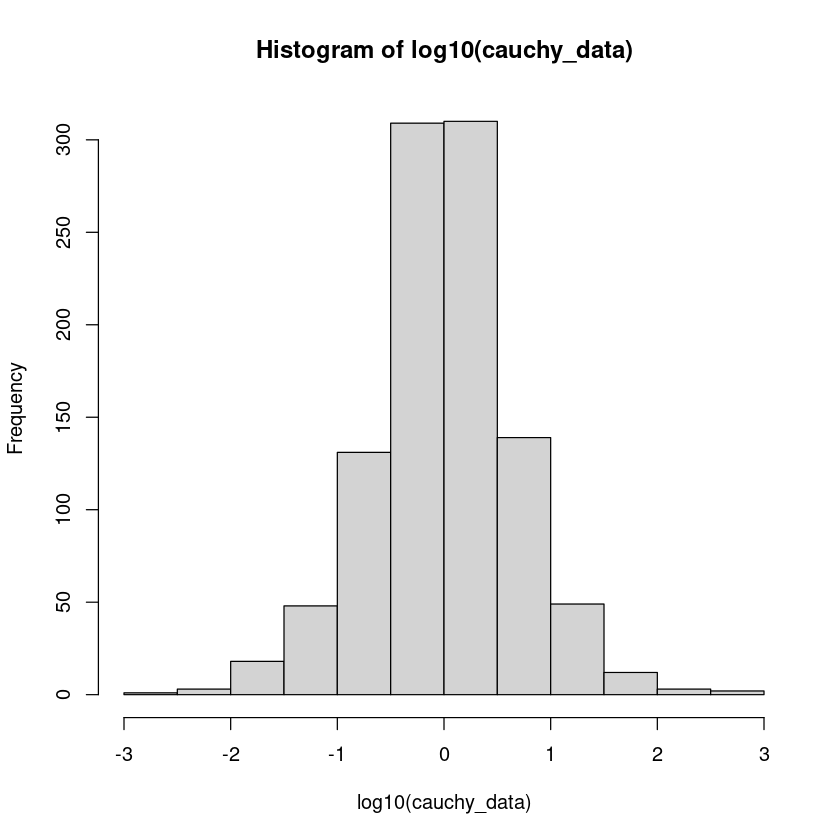

In [37]:
cauchy_data = rcauchy(2000)

hist( log10(cauchy_data) )
shapiro.test( log10(cauchy_data) )

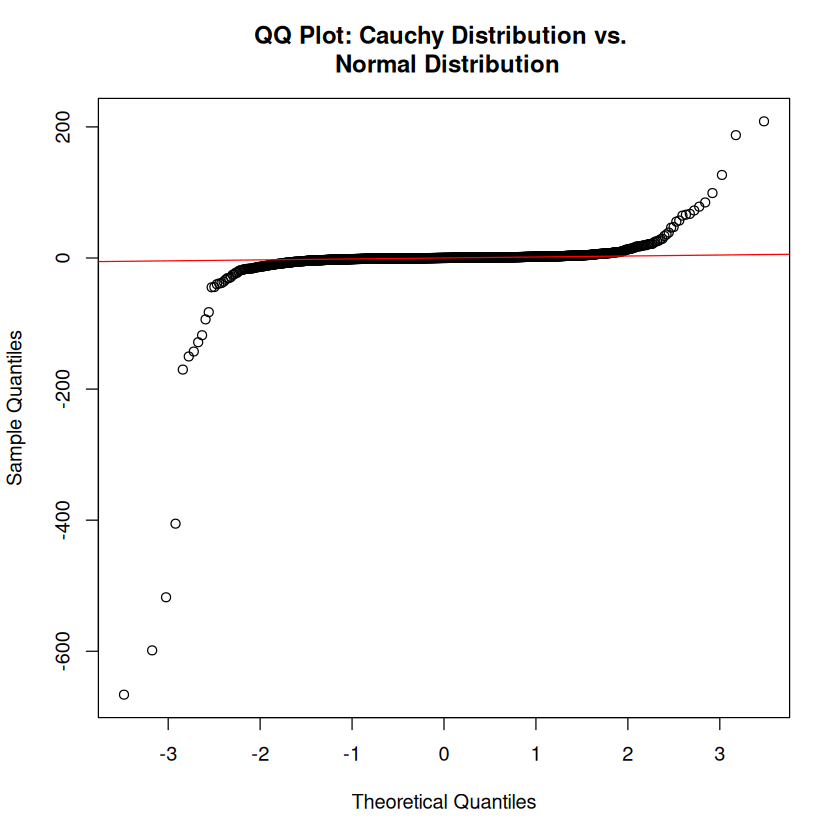

In [14]:
cauchy_data = rcauchy(2000)

qqnorm(cauchy_data, main = "QQ Plot: Cauchy Distribution vs. \n Normal Distribution")
qqline(cauchy_data, col = "red")

Warning message in qqnorm(log10(cauchy_data), main = "QQ Plot: Cauchy Distribution vs. \n Normal Distribution"):
“NaNs produced”


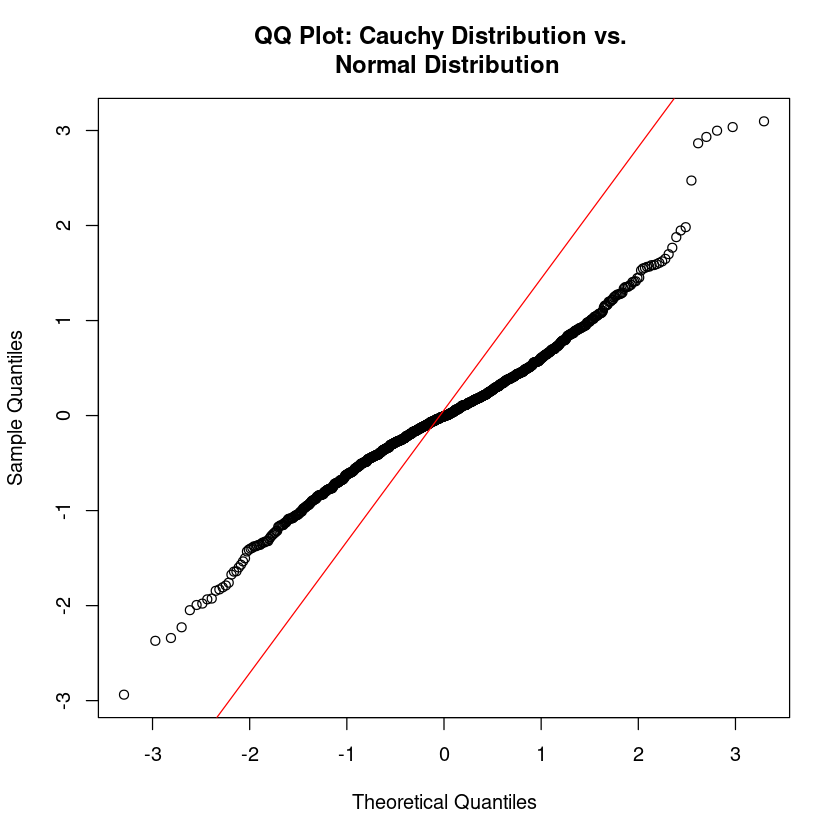

In [38]:
cauchy_data = rcauchy(2000)

qqnorm( log10(cauchy_data), main = "QQ Plot: Cauchy Distribution vs. \n Normal Distribution")
qqline(cauchy_data, col = "red")

### cauchy but change the center

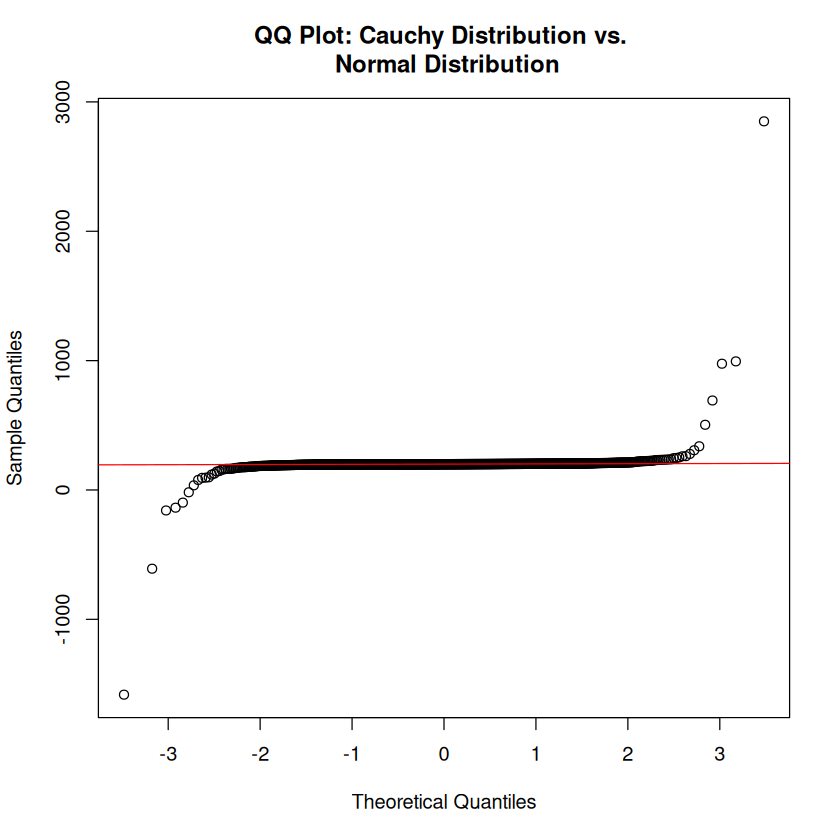

In [17]:
cauchy_data = rcauchy(2000, location = 200)

qqnorm(cauchy_data, main = "QQ Plot: Cauchy Distribution vs. \n Normal Distribution")
qqline(cauchy_data, col = "red")

### multimodal distributions, 2 normals

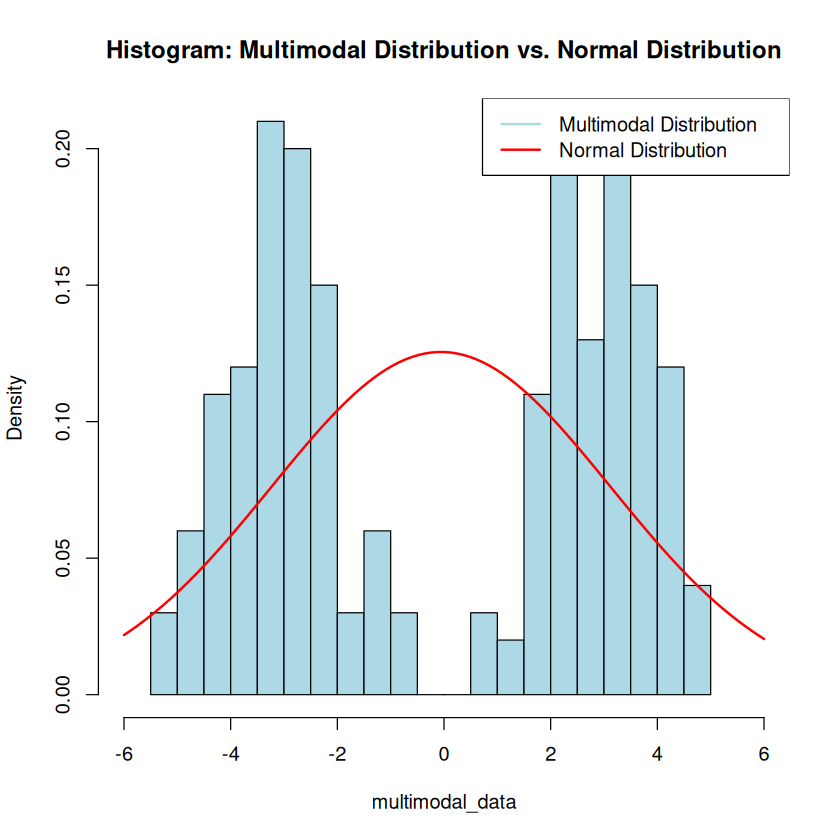

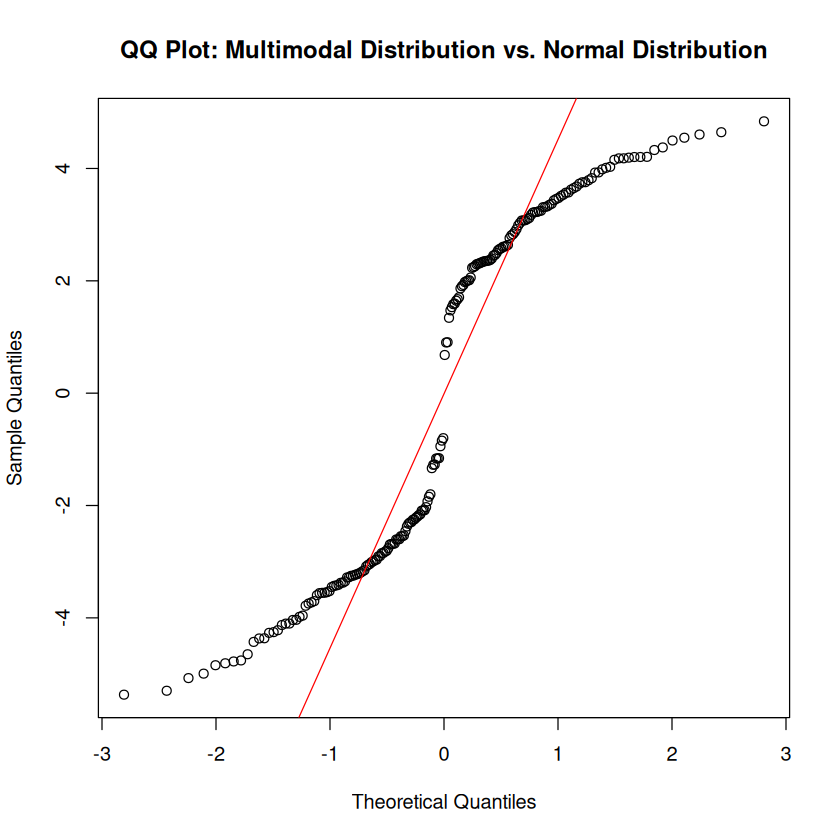

In [19]:
normal_data1 = rnorm(100, mean = -3, sd = 1)
normal_data2 = rnorm(100, mean = 3, sd = 1)
multimodal_data = c(normal_data1, normal_data2)
hist(multimodal_data, probability = TRUE, breaks = 30, main = "Histogram: Multimodal Distribution vs. Normal Distribution", xlim = c(-6, 6), col = "lightblue", border = "black")
curve(dnorm(x, mean = mean(multimodal_data), sd = sd(multimodal_data)), add = TRUE, col = "red", lwd = 2)
legend("topright", legend = c("Multimodal Distribution", "Normal Distribution"), col = c("lightblue", "red"), lwd = 2)

qqnorm(multimodal_data, main = "QQ Plot: Multimodal Distribution vs. Normal Distribution")
qqline(multimodal_data, col = "red")


### 2 normals but not same sample size

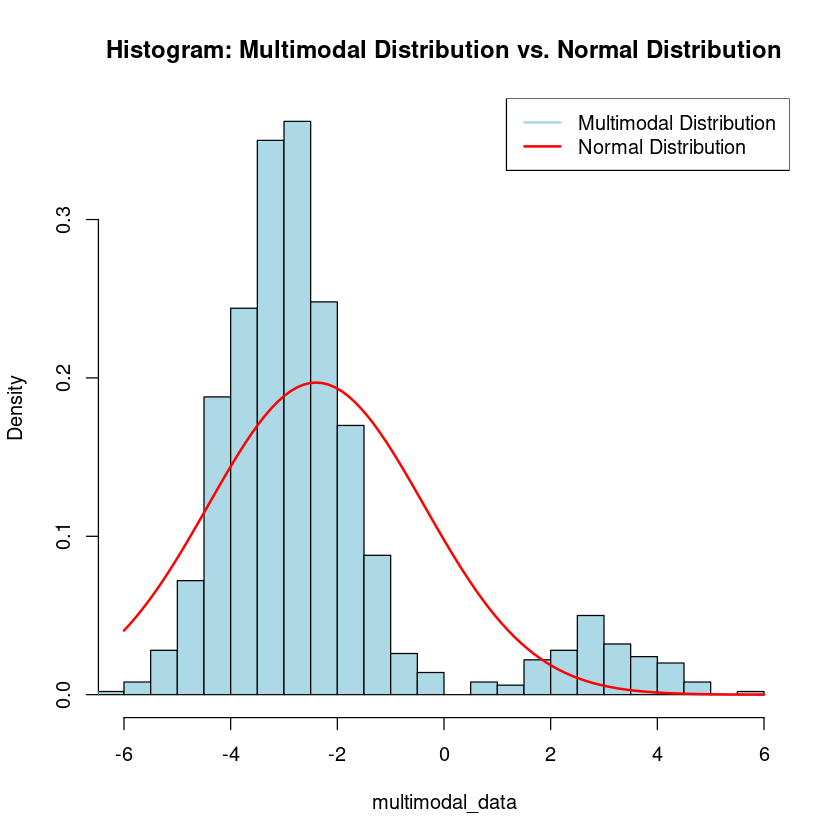

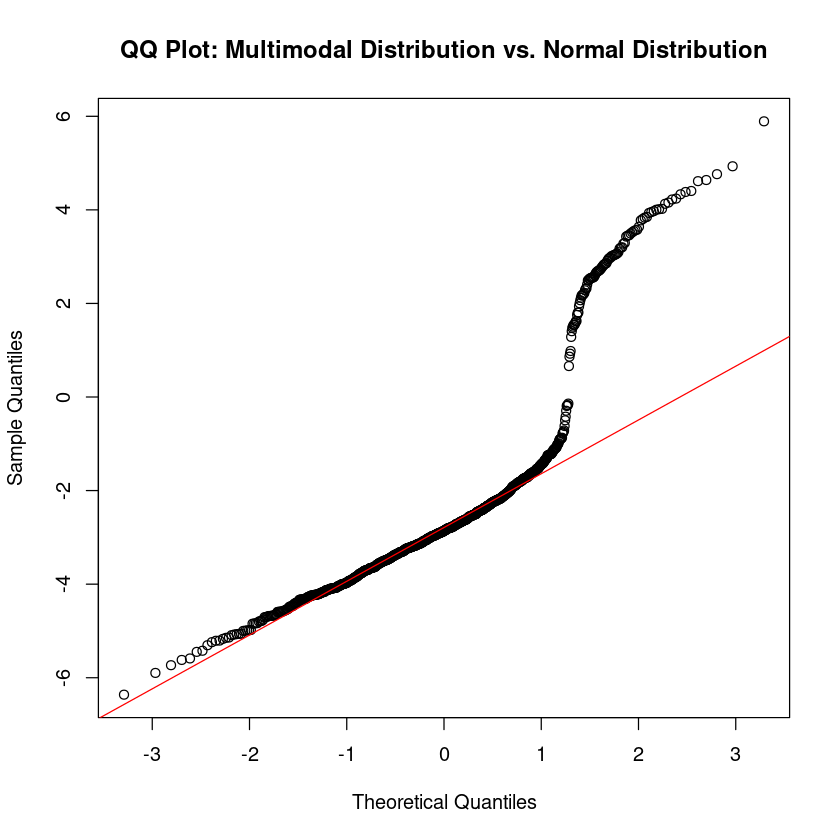

In [43]:
normal_data1 = rnorm(900, mean = -3, sd = 1)
normal_data2 = rnorm(100, mean = 3, sd = 1)
multimodal_data = c(normal_data1, normal_data2)
hist(multimodal_data, probability = TRUE, breaks = 30, main = "Histogram: Multimodal Distribution vs. Normal Distribution", xlim = c(-6, 6), col = "lightblue", border = "black")
curve(dnorm(x, mean = mean(multimodal_data), sd = sd(multimodal_data)), add = TRUE, col = "red", lwd = 2)
legend("topright", legend = c("Multimodal Distribution", "Normal Distribution"), col = c("lightblue", "red"), lwd = 2)

qqnorm(multimodal_data, main = "QQ Plot: Multimodal Distribution vs. Normal Distribution")
qqline(multimodal_data, col = "red")

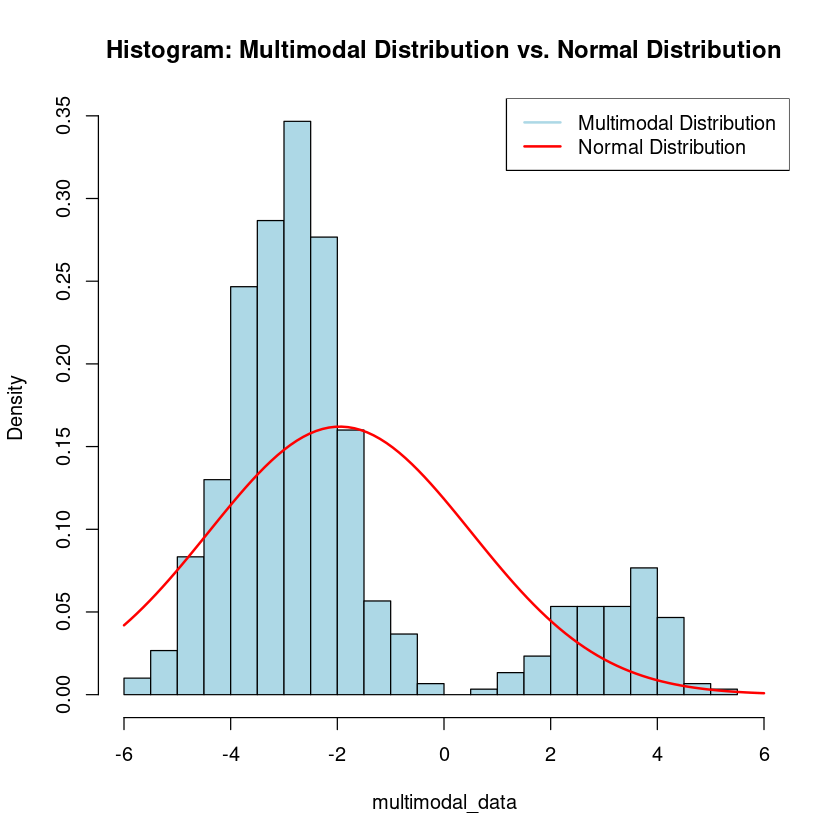

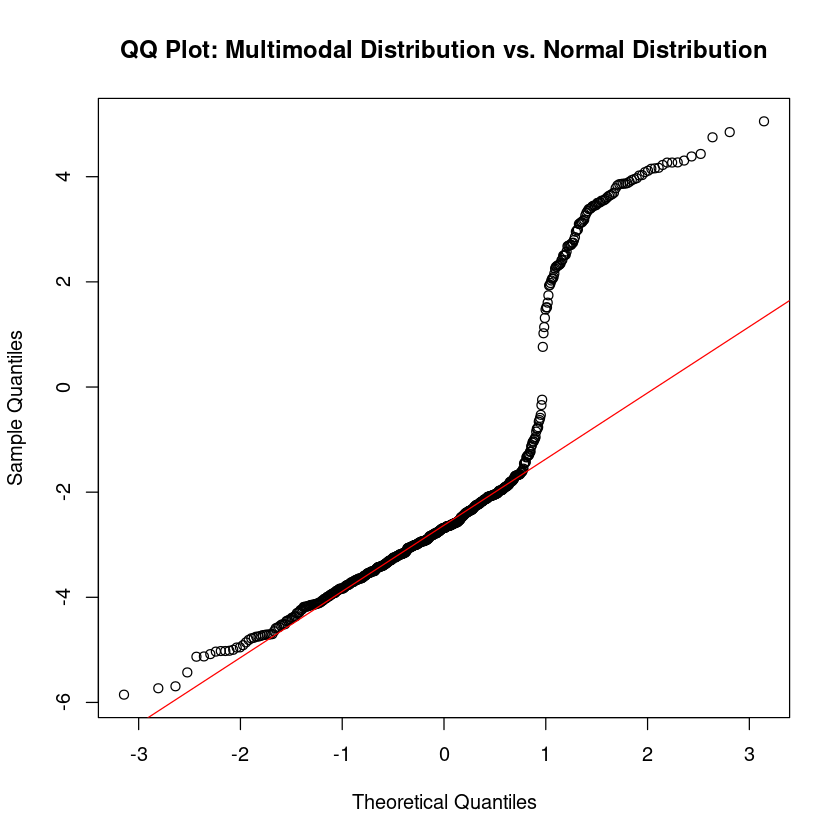

In [40]:
normal_data1 = rnorm(500, mean = -3, sd = 1)
normal_data2 = rnorm(100, mean = 3, sd = 1)
multimodal_data = c(normal_data1, normal_data2)
hist(multimodal_data, probability = TRUE, breaks = 30, main = "Histogram: Multimodal Distribution vs. Normal Distribution", xlim = c(-6, 6), col = "lightblue", border = "black")
curve(dnorm(x, mean = mean(multimodal_data), sd = sd(multimodal_data)), add = TRUE, col = "red", lwd = 2)
legend("topright", legend = c("Multimodal Distribution", "Normal Distribution"), col = c("lightblue", "red"), lwd = 2)

qqnorm(multimodal_data, main = "QQ Plot: Multimodal Distribution vs. Normal Distribution")
qqline(multimodal_data, col = "red")

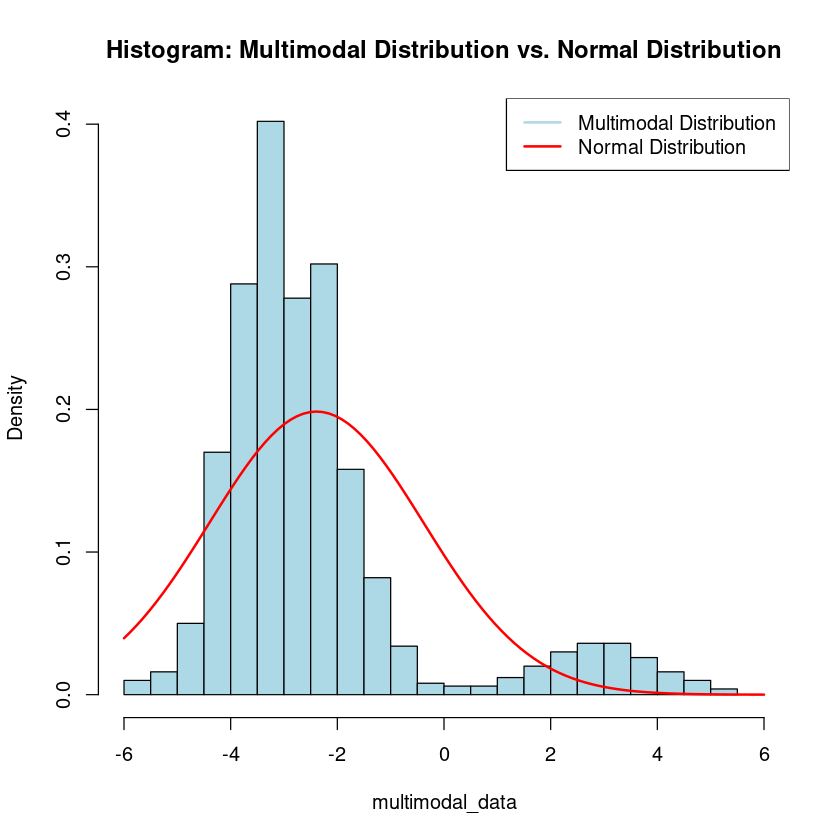

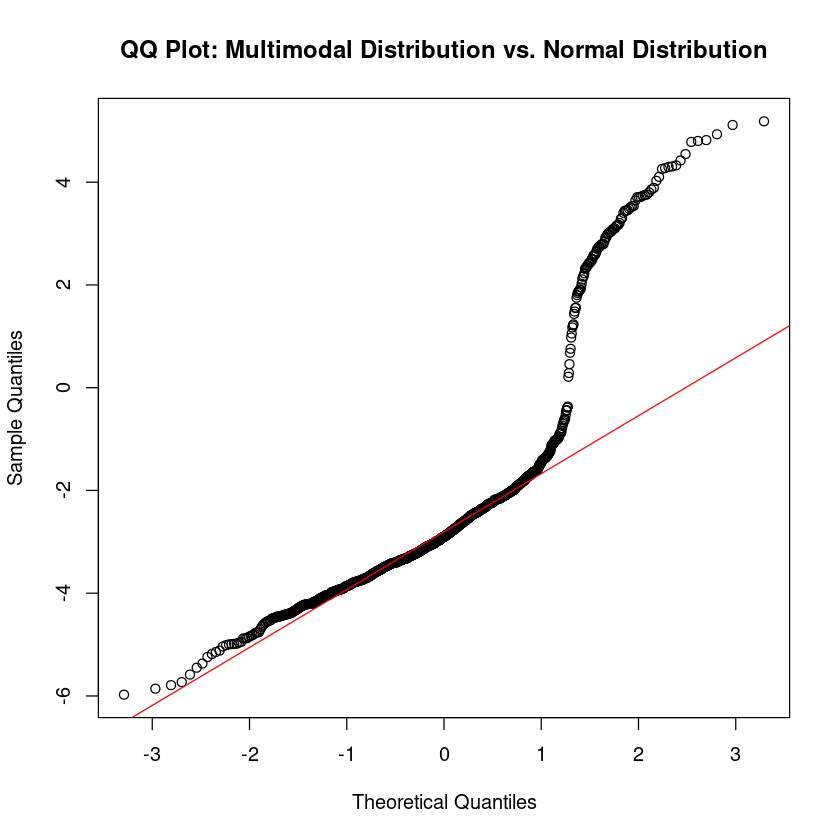

In [41]:
normal_data1 = rnorm(900, mean = -3, sd = 1)
normal_data2 = rnorm(100, mean = 3, sd = 1)
multimodal_data = c(normal_data1, normal_data2)
hist(multimodal_data, probability = TRUE, breaks = 30, main = "Histogram: Multimodal Distribution vs. Normal Distribution", xlim = c(-6, 6), col = "lightblue", border = "black")
curve(dnorm(x, mean = mean(multimodal_data), sd = sd(multimodal_data)), add = TRUE, col = "red", lwd = 2)
legend("topright", legend = c("Multimodal Distribution", "Normal Distribution"), col = c("lightblue", "red"), lwd = 2)

qqnorm(multimodal_data, main = "QQ Plot: Multimodal Distribution vs. Normal Distribution")
qqline(multimodal_data, col = "red")

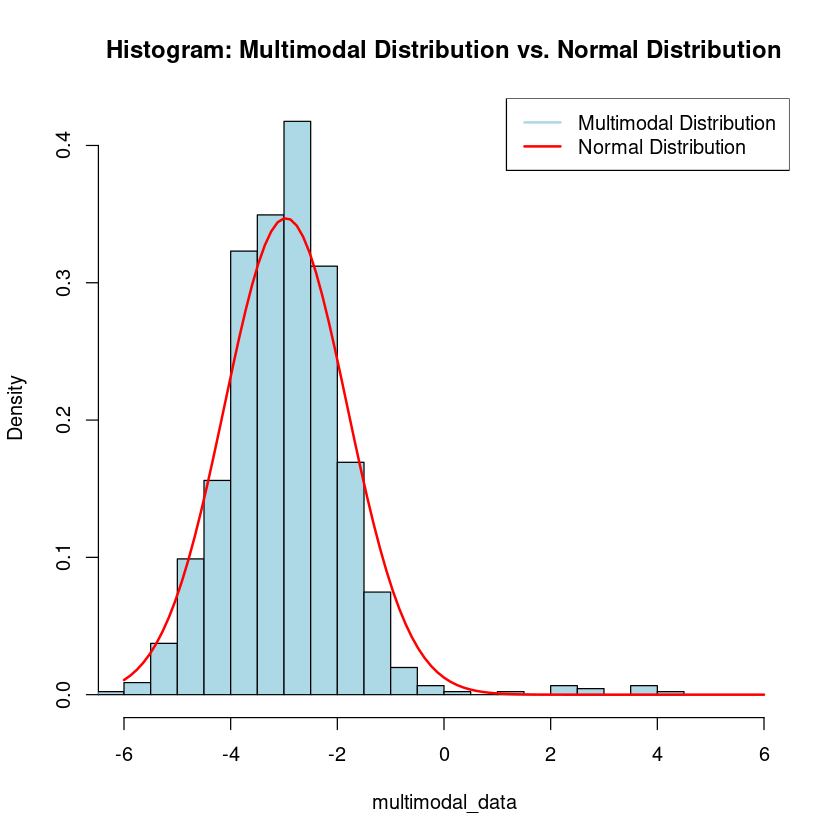

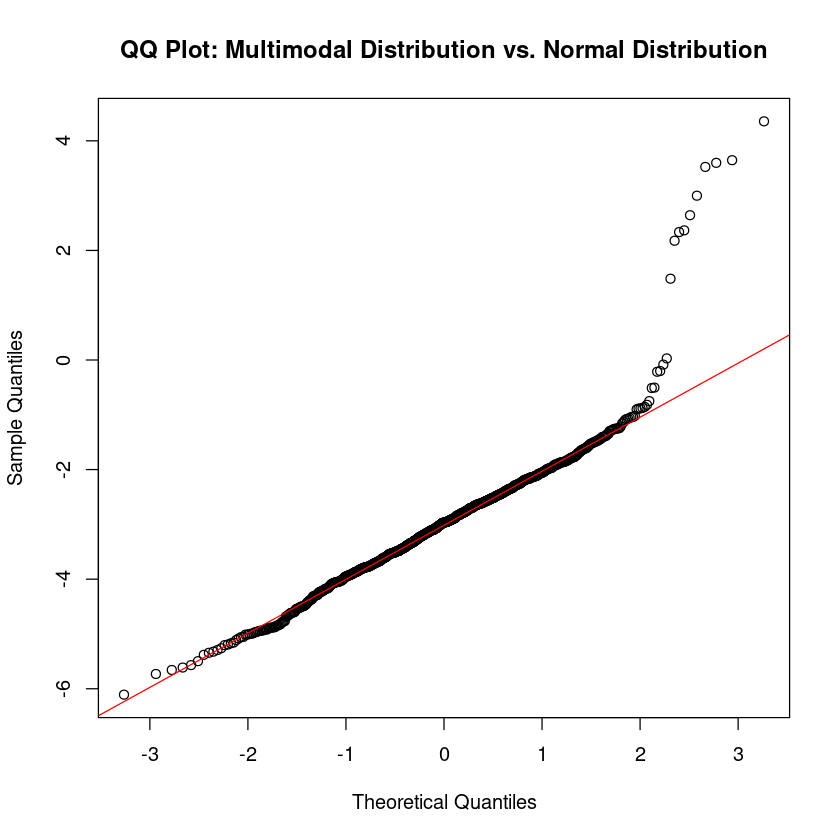

In [44]:
normal_data1 = rnorm(900, mean = -3, sd = 1)
normal_data2 = rnorm(10, mean = 3, sd = 1)
multimodal_data = c(normal_data1, normal_data2)
hist(multimodal_data, probability = TRUE, breaks = 30, main = "Histogram: Multimodal Distribution vs. Normal Distribution", xlim = c(-6, 6), col = "lightblue", border = "black")
curve(dnorm(x, mean = mean(multimodal_data), sd = sd(multimodal_data)), add = TRUE, col = "red", lwd = 2)
legend("topright", legend = c("Multimodal Distribution", "Normal Distribution"), col = c("lightblue", "red"), lwd = 2)

qqnorm(multimodal_data, main = "QQ Plot: Multimodal Distribution vs. Normal Distribution")
qqline(multimodal_data, col = "red")

### 3 normals (3 modes)

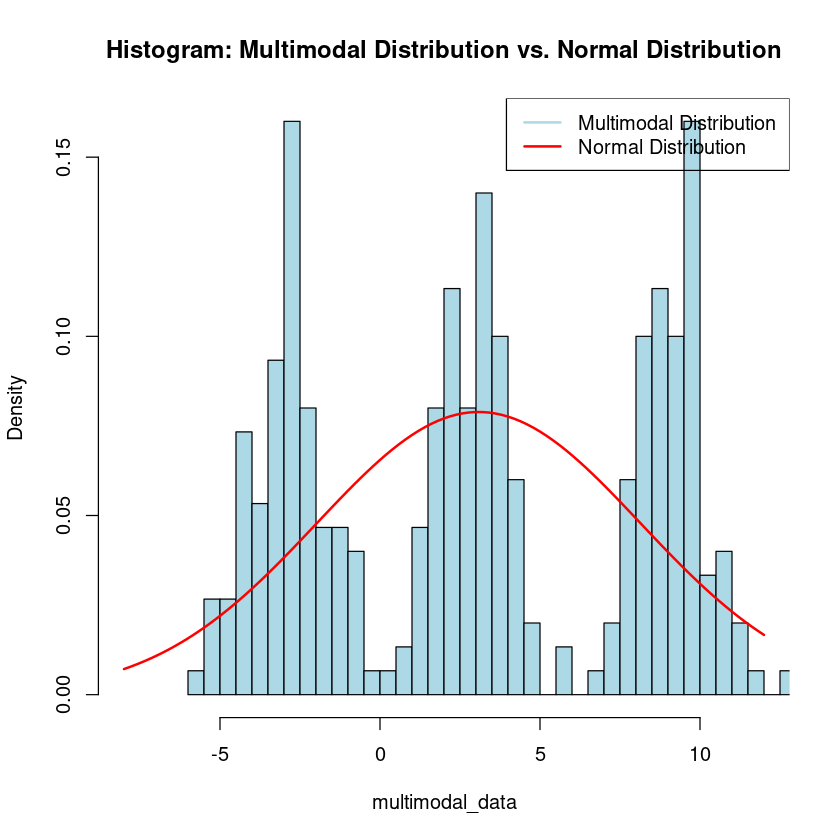

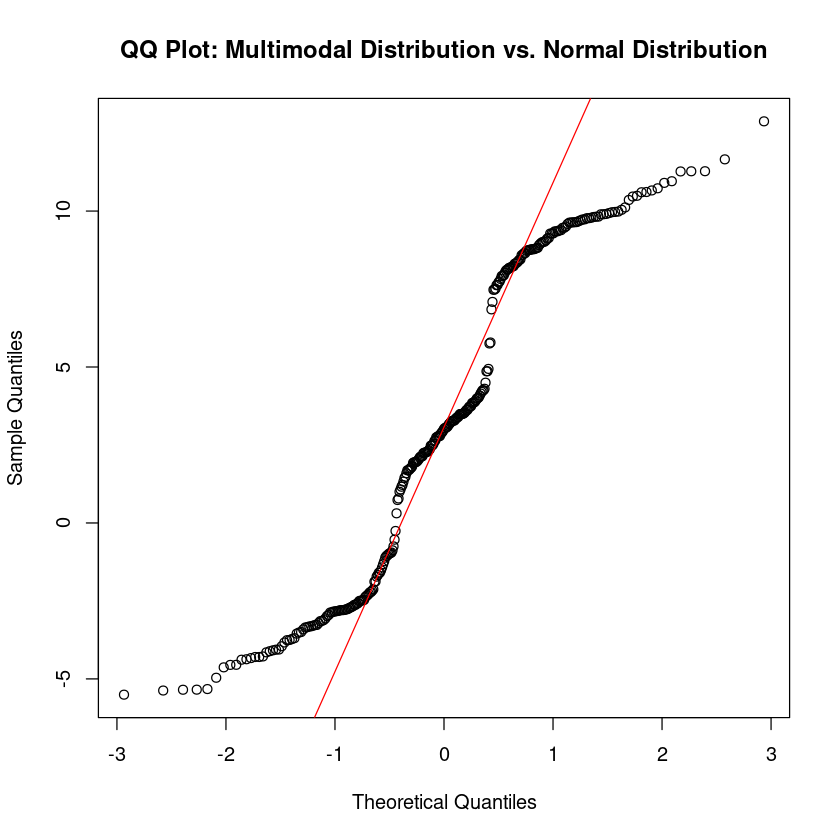

In [45]:
normal_data1 = rnorm(100, mean = -3, sd = 1)
normal_data2 = rnorm(100, mean = 3, sd = 1)
normal_data3 = rnorm(100, mean = 9, sd = 1)
multimodal_data = c(normal_data1, normal_data2, normal_data3)
hist(multimodal_data, probability = TRUE, breaks = 30, main = "Histogram: Multimodal Distribution vs. Normal Distribution", xlim = c(-8, 12), col = "lightblue", border = "black")
curve(dnorm(x, mean = mean(multimodal_data), sd = sd(multimodal_data)), add = TRUE, col = "red", lwd = 2)
legend("topright", legend = c("Multimodal Distribution", "Normal Distribution"), col = c("lightblue", "red"), lwd = 2)

qqnorm(multimodal_data, main = "QQ Plot: Multimodal Distribution vs. Normal Distribution")
qqline(multimodal_data, col = "red")

### 3 modes unbalanced

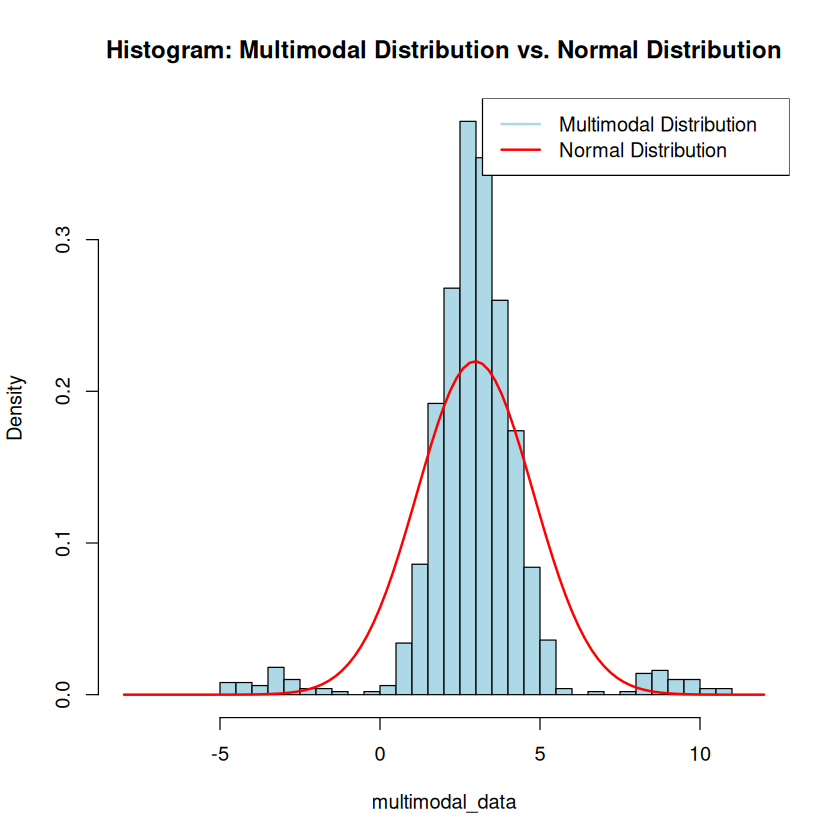

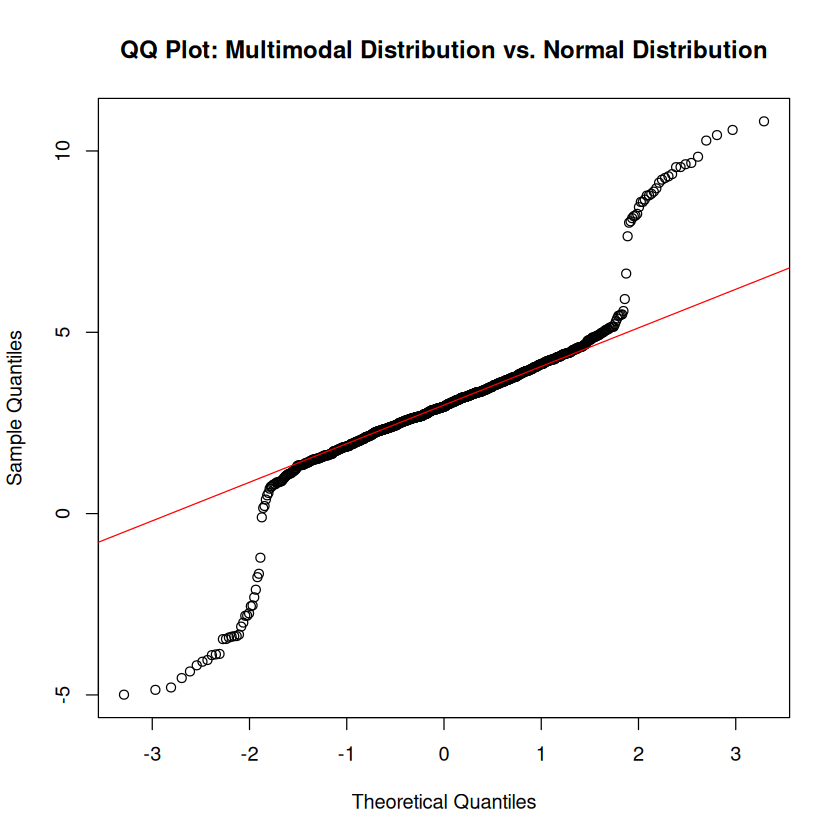

In [29]:
normal_data1 = rnorm(30, mean = -3, sd = 1)
normal_data2 = rnorm(940, mean = 3, sd = 1)
normal_data3 = rnorm(30, mean = 9, sd = 1)
multimodal_data = c(normal_data1, normal_data2, normal_data3)
hist(multimodal_data, probability = TRUE, breaks = 30, main = "Histogram: Multimodal Distribution vs. Normal Distribution", xlim = c(-8, 12), col = "lightblue", border = "black")
curve(dnorm(x, mean = mean(multimodal_data), sd = sd(multimodal_data)), add = TRUE, col = "red", lwd = 2)
legend("topright", legend = c("Multimodal Distribution", "Normal Distribution"), col = c("lightblue", "red"), lwd = 2)

qqnorm(multimodal_data, main = "QQ Plot: Multimodal Distribution vs. Normal Distribution")
qqline(multimodal_data, col = "red")

# 2 sample QQ

### 2 gammas with same params

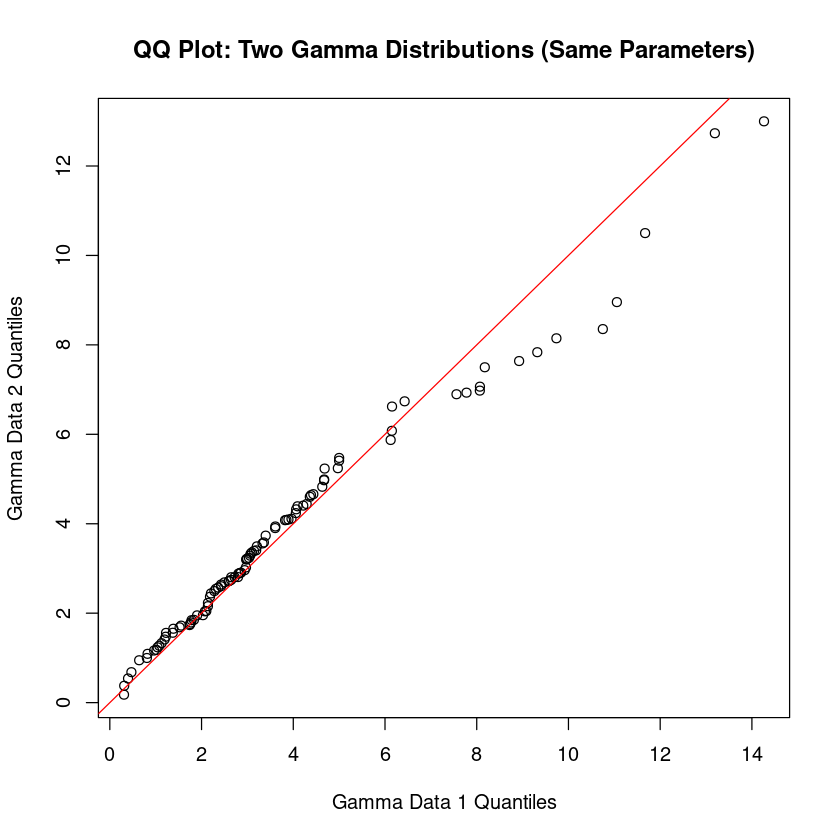

In [49]:

gamma_data1 = rgamma(100, shape = 2, scale = 2)
gamma_data2 = rgamma(100, shape = 2, scale = 2)

qqplot(gamma_data1, gamma_data2, main = "QQ Plot: Two Gamma Distributions (Same Parameters)", xlab = "Gamma Data 1 Quantiles", ylab = "Gamma Data 2 Quantiles")
abline(0, 1, col = "red")


### 2 gammas different params

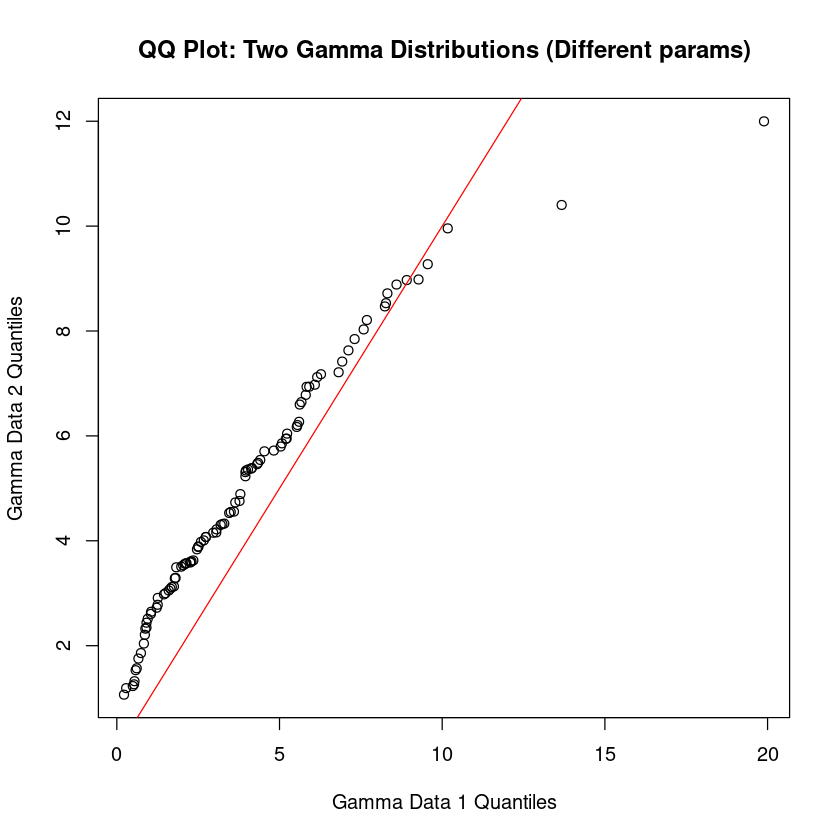

In [50]:

gamma_data1 = rgamma(100, shape = 2, scale = 2)
gamma_data2 = rgamma(100, shape = 5, scale = 1)

qqplot(gamma_data1, gamma_data2, main = "QQ Plot: Two Gamma Distributions (Different params)", xlab = "Gamma Data 1 Quantiles", ylab = "Gamma Data 2 Quantiles")
abline(0, 1, col = "red")

### normal data vs gamma data

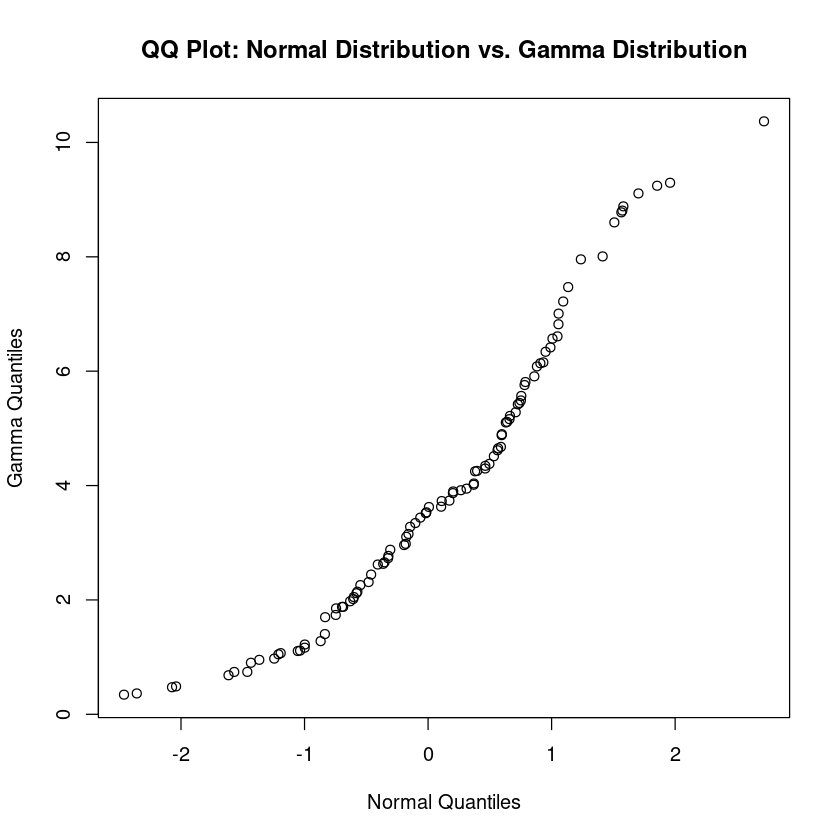

In [52]:
normal_data = rnorm(100, mean = 0, sd = 1)
gamma_data = rgamma(100, shape = 2, scale = 2)

qqplot(normal_data, gamma_data, main = "QQ Plot: Normal Distribution vs. Gamma Distribution", xlab = "Normal Quantiles", ylab = "Gamma Quantiles")


### cauchy distribution vs normal distribution

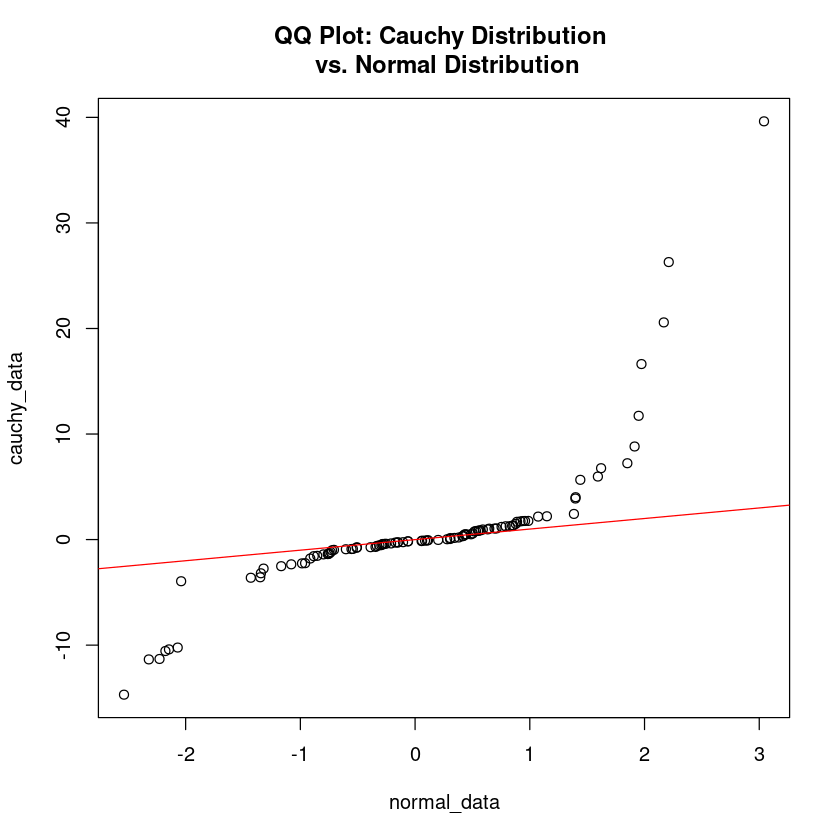

In [53]:

cauchy_data = rcauchy(100)
normal_data = rnorm(100, mean = 0, sd = 1)

qqplot(normal_data, cauchy_data, main = "QQ Plot: Cauchy Distribution \n vs. Normal Distribution")
abline(0, 1, col = "red")

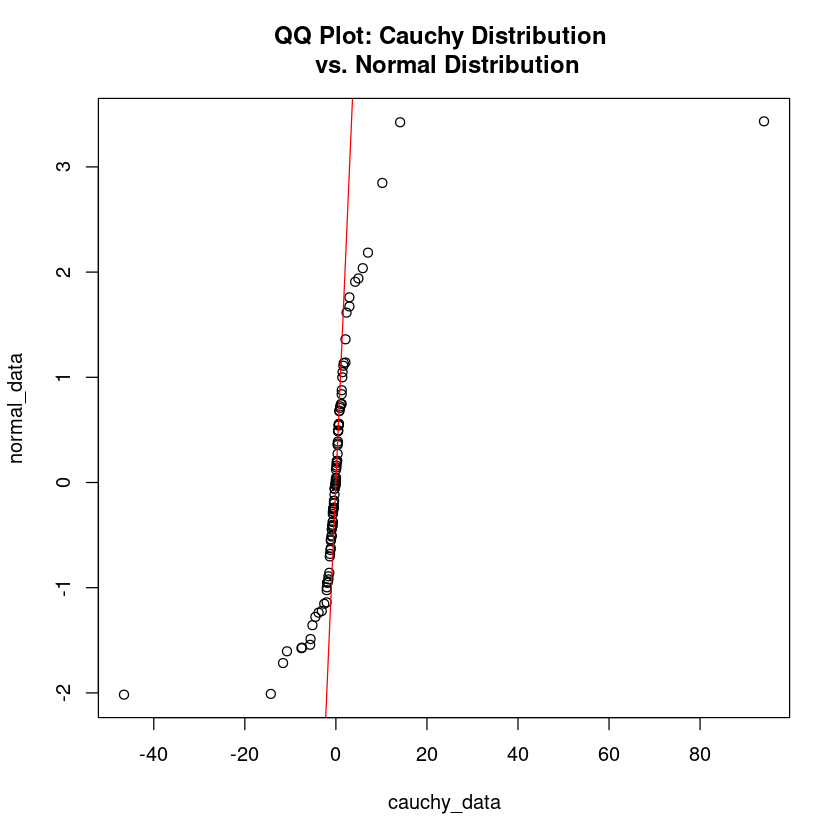

In [54]:
#smae but put the order differently
cauchy_data = rcauchy(100)
normal_data = rnorm(100, mean = 0, sd = 1)

qqplot(cauchy_data, normal_data, main = "QQ Plot: Cauchy Distribution \n vs. Normal Distribution")
abline(0, 1, col = "red")

### poisson distribution vs gamma distribution

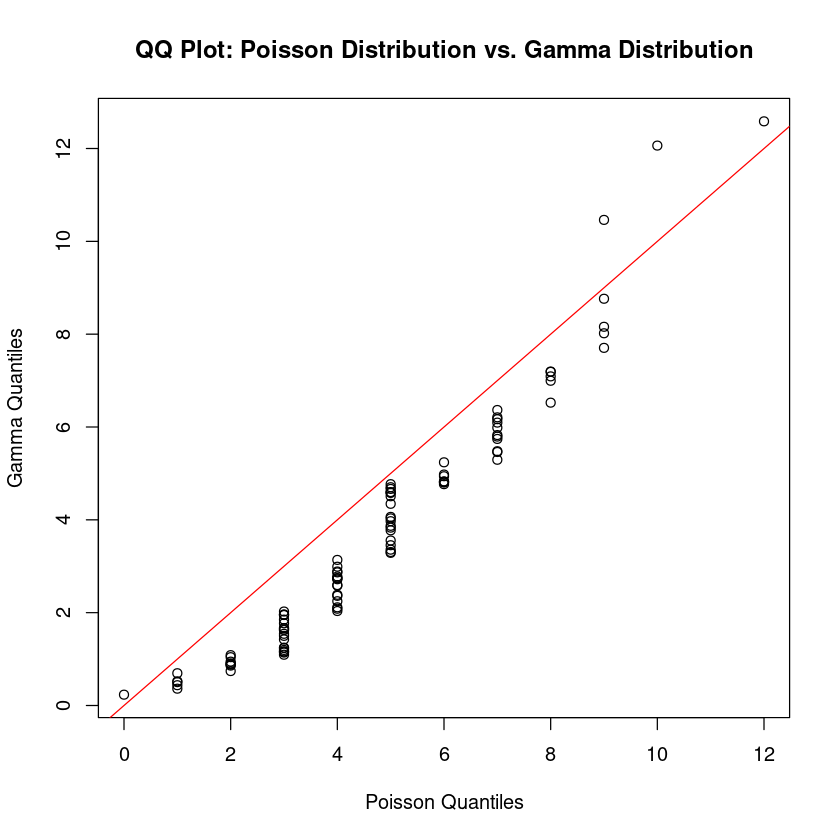

In [55]:
poisson_data = rpois(100, lambda = 5)
gamma_data = rgamma(100, shape = 2, scale = 2)

qqplot(poisson_data, gamma_data, main = "QQ Plot: Poisson Distribution vs. Gamma Distribution", xlab = "Poisson Quantiles", ylab = "Gamma Quantiles")
abline(0, 1, col = "red")

# QQ for time series

### 2 times series of random simple series

In [68]:
cumsum(1:10)
cat(1:10)

[1]  1  3  6 10 15 21 28 36 45 55

1 2 3 4 5 6 7 8 9 10

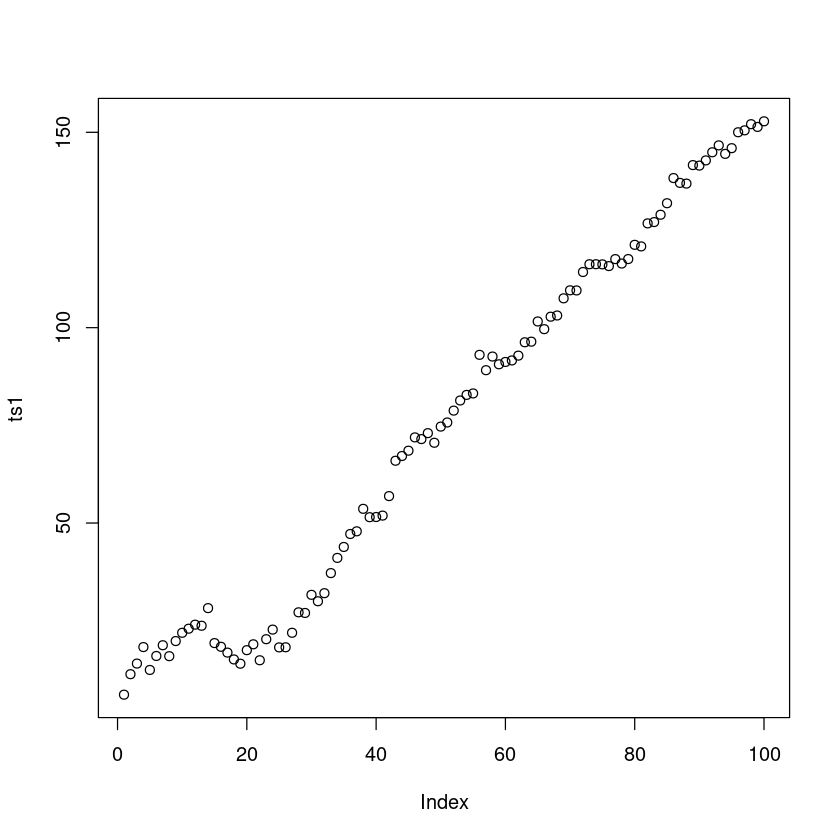

In [69]:
ts1 = cumsum( rnorm(100,mean = 2,sd=3) )

plot(ts1)

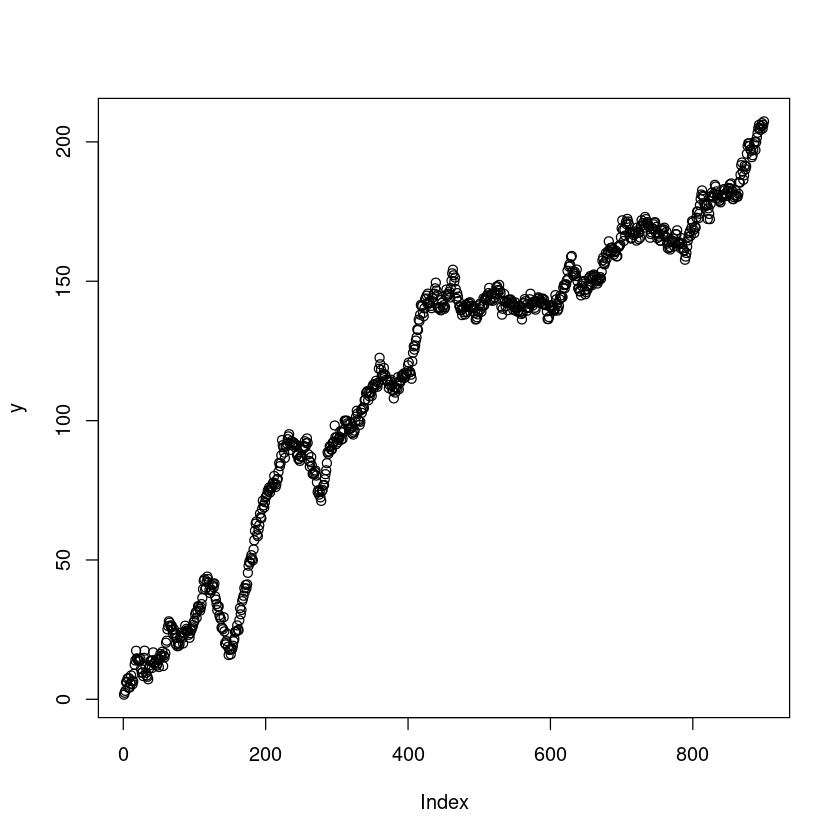

In [78]:
y = c()
y[1] = rnorm(1,mean=1,sd = 2)
for(i in 2:900) {
    y[i] = y[i-1] + rnorm(1,mean = 0.04,sd = 2) 
}

plot(y)

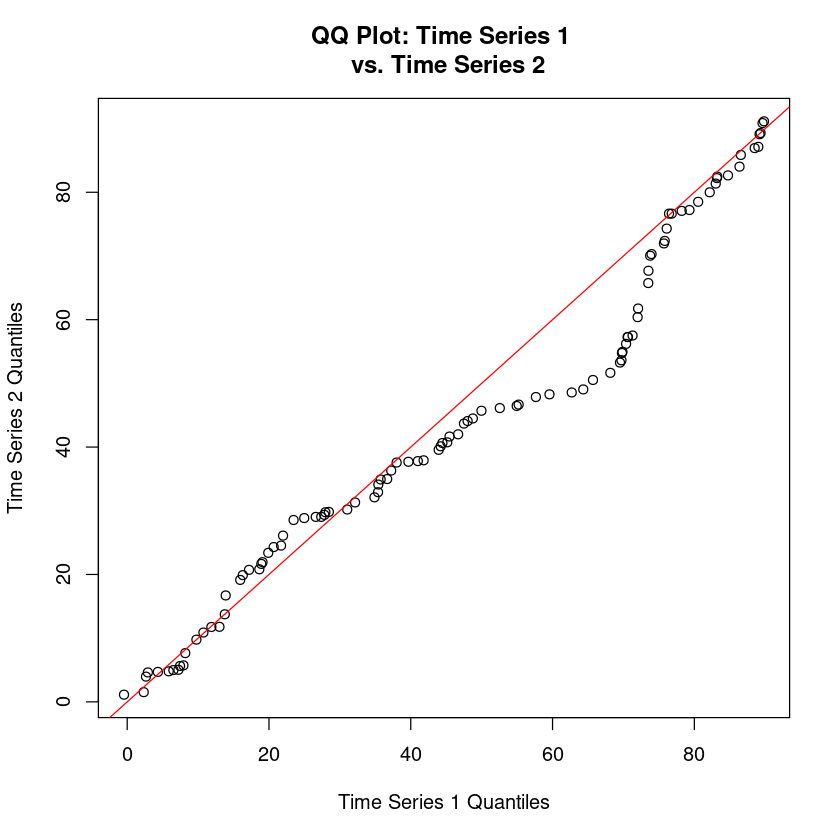

In [4]:
ts1 = cumsum(rnorm(100,mean=1))  # First time series (random walk)
ts2 = cumsum(rnorm(100, mean = 1))  # Second time series (random walk with drift)
#assume both are stationary
qqplot(ts1, ts2, main = "QQ Plot: Time Series 1 \n vs. Time Series 2", xlab = "Time Series 1 Quantiles", ylab = "Time Series 2 Quantiles")
abline(0, 1, col = "red")

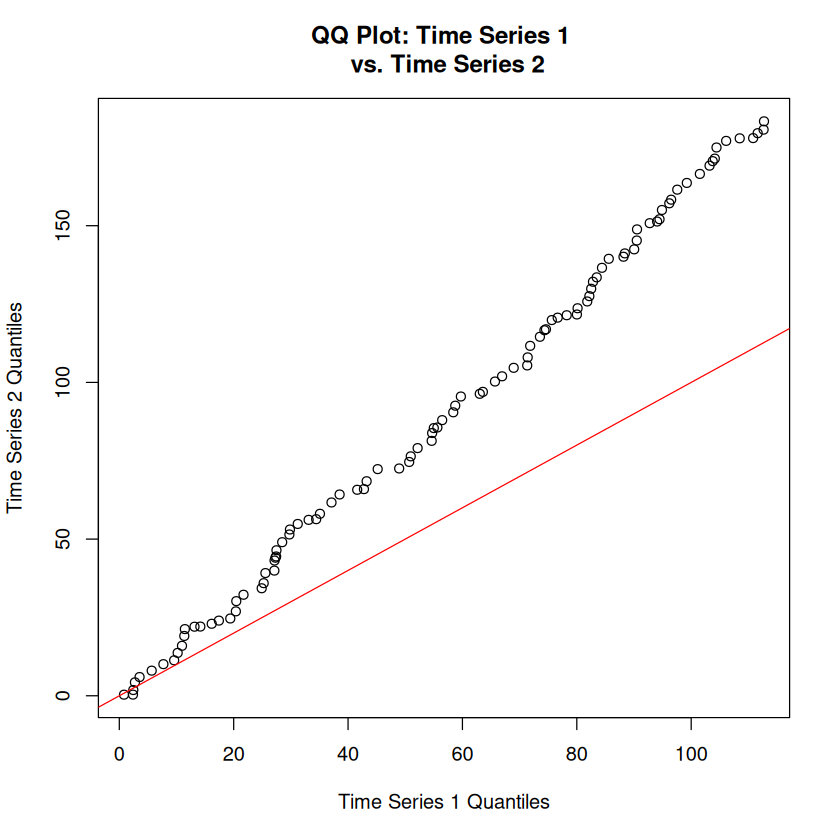

In [54]:
ts1 = cumsum(rnorm(100,mean=1))  # First time series (random walk)
ts2 = cumsum(rnorm(100, mean = 1.75))  # Second time series (random walk with drift)
#assume both are stationary
qqplot(ts1, ts2, main = "QQ Plot: Time Series 1 \n vs. Time Series 2", xlab = "Time Series 1 Quantiles", ylab = "Time Series 2 Quantiles")
abline(0, 1, col = "red")

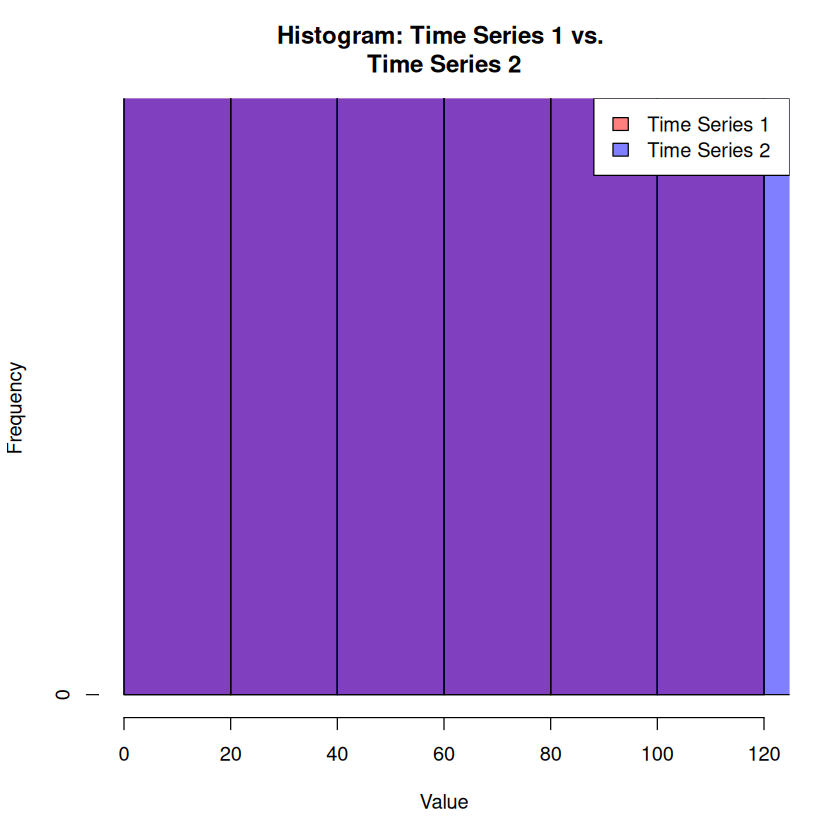

In [58]:
hist(ts1, probability = F, col = rgb(1, 0, 0, 0.5), main = "Histogram: Time Series 1 vs. \nTime Series 2", xlab = "Value", ylim = c(0, 0.5))
hist(ts2, probability = F, col = rgb(0, 0, 1, 0.5), add = TRUE)
legend("topright", legend = c("Time Series 1", "Time Series 2"), fill = c(rgb(1, 0, 0, 0.5), rgb(0, 0, 1, 0.5)))

### qqplot on the diffs of the series (de-trended)

In [81]:
diff(1:100)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[77] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

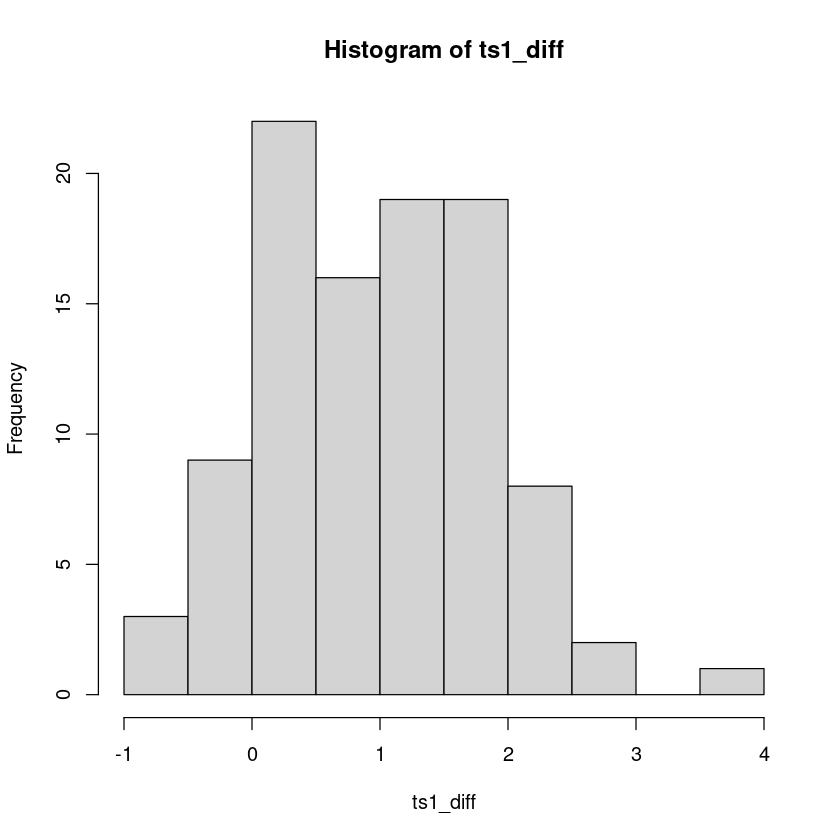

In [80]:
ts1 = cumsum(rnorm(100,mean=1))
ts1_diff = diff(ts1)
hist(ts1_diff)

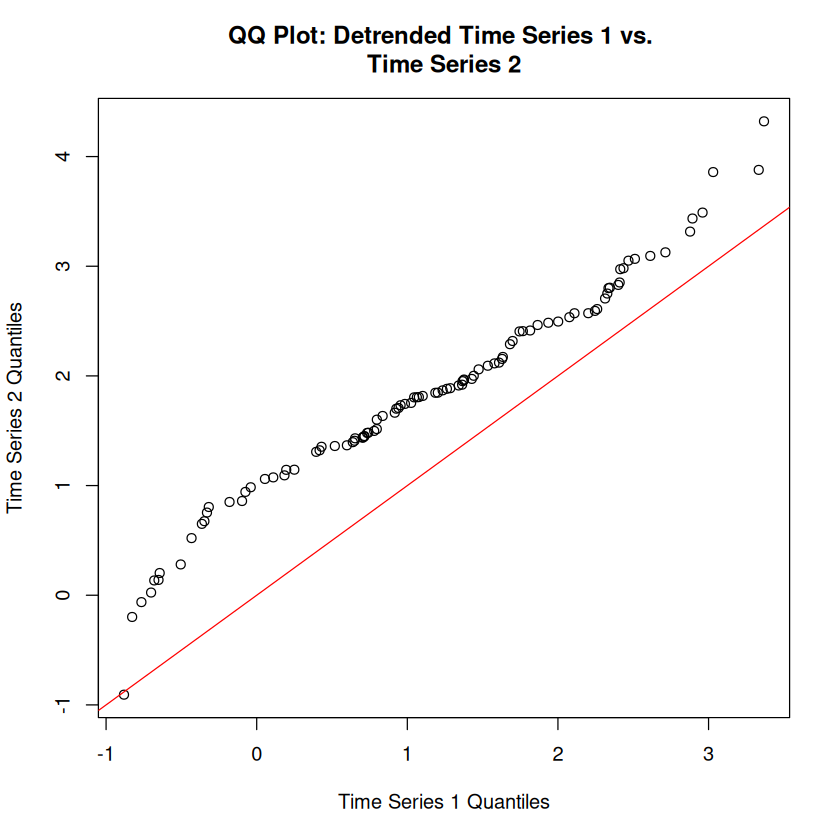

In [56]:
ts1 = cumsum(rnorm(100,mean=1))
ts2 = cumsum(rnorm(100, mean = 1.75))
ts1_diff = diff(ts1)
ts2_diff = diff(ts2)

qqplot(ts1_diff, ts2_diff, main = "QQ Plot: Detrended Time Series 1 vs. \nTime Series 2", xlab = "Time Series 1 Quantiles", ylab = "Time Series 2 Quantiles")
abline(0, 1, col = "red")

### non-stationary and stationary (heterogeneous)

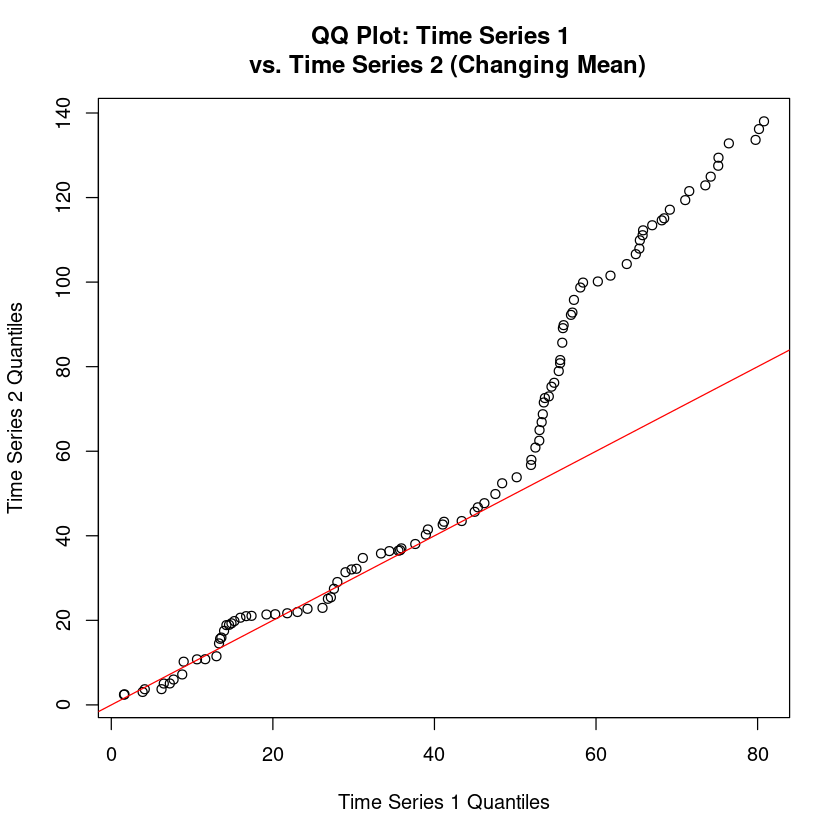

In [82]:
ts1 = cumsum(rnorm(100, mean = 1))
ts2_part1 = rnorm(50, mean = 1)
ts2_part2 = rnorm(50, mean = 2)
ts2 = cumsum(c(ts2_part1, ts2_part2))
qqplot(ts1, ts2, main = "QQ Plot: Time Series 1 \n vs. Time Series 2 (Changing Mean)", xlab = "Time Series 1 Quantiles", ylab = "Time Series 2 Quantiles")
abline(0, 1, col = "red")

In [62]:
#install.packages('forecast')
# install.packages("curl")
# install.packages("TTR")
# install.packages("quantmod")
# install.packages("tseries")
# install.packages("forecast")

In [64]:
# install.packages("forecast", dependencies = TRUE)

In [81]:
# install.packages("ragg")
# install.packages("pkgdown")

# install.packages("curl")
# install.packages("openssl")
# install.packages("xml2")
# install.packages("systemfonts")
# install.packages("textshaping")
# install.packages("rcmdcheck")
# install.packages("roxygen2")
# install.packages("rversions")
# install.packages("urlchecker")
# install.packages("devtools")


Installing package into ‘/home/sweet/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)



Installing package into ‘/home/sweet/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

Installing package into ‘/home/sweet/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

Installing package into ‘/home/sweet/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

Installing package into ‘/home/sweet/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

Installing package into ‘/home/sweet/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

Installing package into ‘/home/sweet/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

Installing package into ‘/home/sweet/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

Installing package into ‘/home/sweet/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

Installing package into ‘/home/sweet/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

Installing package into ‘/home/sweet/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

Installing

In [82]:
install.packages("devtools", dependencies = c("Depends", "Imports"))

Installing package into ‘/home/sweet/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)



In [83]:
library(devtools)


Loading required package: usethis



In [84]:
devtools::install_github("robjhyndman/forecast")

TTR        (NA     -> 0.24.4 ) [CRAN]
cli        (3.6.2  -> 3.6.3  ) [CRAN]
colorspace (2.1-0  -> 2.1-1  ) [CRAN]
Rcpp       (1.0.12 -> 1.0.13 ) [CRAN]
quantmod   (NA     -> 0.4.26 ) [CRAN]
withr      (3.0.0  -> 3.0.1  ) [CRAN]
tseries    (NA     -> 0.10-57) [CRAN]


Installing 7 packages: TTR, cli, colorspace, Rcpp, quantmod, withr, tseries

Installing packages into ‘/home/sweet/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/Rtmppya0JZ/remotes10d2b6d7031db/robjhyndman-forecast-0583d2f/DESCRIPTION’ ... OK
* preparing ‘forecast’:
* checking DESCRIPTION meta-information ... OK
* cleaning src
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘forecast_8.23.0.9000.tar.gz’



Installing package into ‘/home/sweet/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)



In [85]:
library(forecast)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [88]:
ts1 = cumsum(rnorm(100))  #time series (random walk)

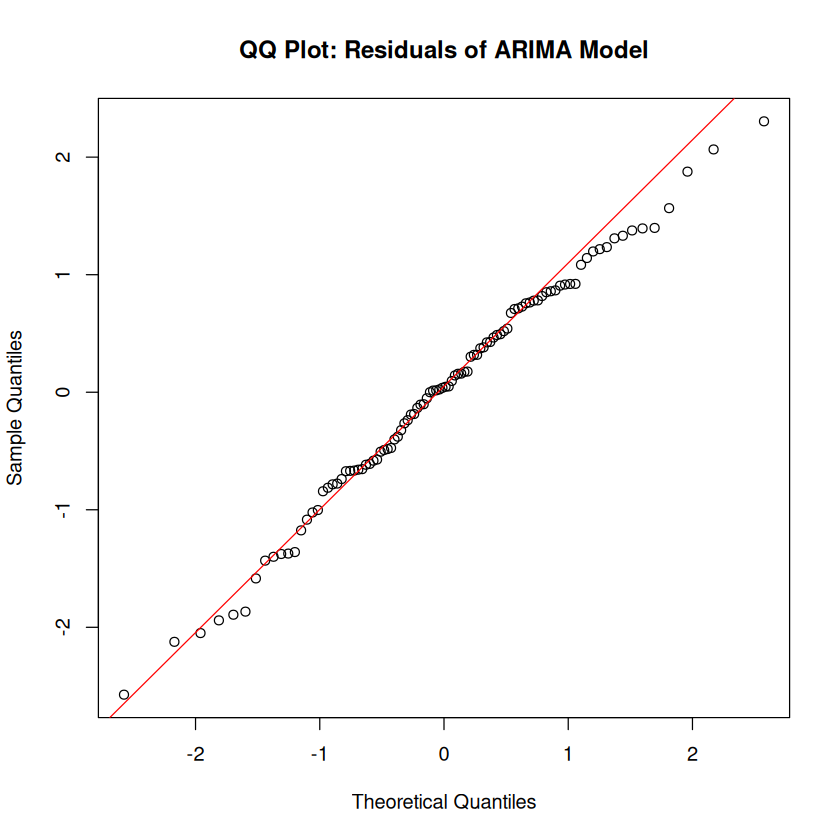

In [89]:
fit = auto.arima(ts1)

#xtract the residuals
residuals <- residuals(fit)

# QQ plot of the residuals
qqnorm(residuals, main = "QQ Plot: Residuals of ARIMA Model")
qqline(residuals, col = "red")